<a href="https://colab.research.google.com/github/shintaroudlotulhanafia/TugasAkhirMultipleStocks/blob/main/DRLRobustnessTest/5_PandemicDataOnTrading_TugasAkhir_Shinta_DRLforMultipleStockTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PandemicDataOnTrading(3) dijalankan menggunakan email shintaroudlotulhanafia@gmail.com

# Deep Reinforcement Learning untuk Jual-Beli Saham (Dari Awal): Jual-beli Banyak Saham 

* **Pytorch Version** 



**Memasangkan Google Drive ke Google Colab**

* Kata kunci **from** digunakan untuk mengimpor hanya bagian tertentu dari modul.
* Modul merupakan file yang berisi sekumpulan fungsi yang ingin disertakan dalam aplikasi. Untuk membuat modul cukup simpan kode yang Anda inginkan dalam file dengan ekstensi file .py.
* **import** melakukan impor seluruh *library*.
* **from impor** melakukan impor bagian *library* tertentu.
* Mounting adalah proses membuat file dan direktori pada perangkat penyimpanan (seperti google drive) tersedia bagi pengguna untuk dapat diakses.



In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Daftar Isi:

* [1. Pendeskrisian Tugas](#0)
* [2. Instalasi Paket Python](#1)
    * [2.1. Instalasi Paket](#1.1)    
    * [2.2. Daftar Paket Python](#1.2)
    * [2.3. Impot Paket](#1.3)
    * [2.4. Membuat Folder](#1.4)
* [3. Mengunduh Data](#2)
* [4. Memproses Data](#3)        
    * [4.1. IndiKator Teknikal](#3.1)
    * [4.2. Melakukan *Feature Engineering*](#3.2)
* [5. Membangun Lingkungan Jual-Beli Saham dengan OpenAI Gym-style](#4)  
    * [5.1. Pemisahan Data](#4.1)  
    * [5.2. Lingkungan untuk Pelatihan *(Training)*](#4.2)    
* [6. Melatih Agen DRL](#5)
    * [6.1. Agen 1: A2C](#5.1)
    * [6.2. Agen 2: PPO](#5.2)
    * [6.3. Agen 3: TD3](#5.3)
    * [6.4. Agen 4: SAC](#5.4)
    * [6.5. Agen 5: DDPG](#5.5)
* [7. Melakukan Jual-Beli](#6)
    * [7.1. Performa di Dalam Sampel](#6.1)
    * [7.2. Performa di Luar Sampel](#6.2)
    * [7.3. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi](#6.3)
      * [7.3.1. Agen 1: A2C](#6.3.1)
      * [7.3.2. Agen 2: PPO](#6.3.2)
      * [7.3.3. Agen 3: TD3](#6.3.3)
      * [7.3.4. Agen 4: SAC](#6.3.4)
      * [7.3.5. Agen 5: DDPG](#6.3.5)
    * [7.4. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Kondisi dan Aksi](#6.4)
      * [7.4.1. Agen 1: A2C](#6.4.1)
      * [7.4.2. Agen 2: PPO](#6.4.2)
      * [7.4.3. Agen 3: TD3](#6.4.3)
      * [7.4.4. Agen 4: SAC](#6.4.4)
      * [7.4.5. Agen 5: DDPG](#6.4.5)
* [8. Performa Backtesting](#7)  
    * [8.1. Status BackTesting](#7.1)
    * [8.2. Gambaran BackTesting](#7.2)

<a id='0'></a>
# Bagian 1. Pendeskrisian Tugas

Agen DRL dilatih untuk melakukan jual-beli saham. Tugas tersebut dimodelkan sebagai Markov Decision Process (MDP), dengan fungsi dan tujuannya adalah memaksimalkan pengembalian pengembalian kumulatif *(cummulative return)* yang diharapkan.

Definisi state-action-reward pada algoritam DRL kasus kali ini adalah sebagai berikut:

* **State s**: Kondisi atau *state* mewakili persepsi agen tentang lingkungan pasar. Sama seperti *trader* manusia yang menganalisis berbagai informasi, agen juga secara pasif mengamati banyak fitur dan belajar dengan cara berinteraksi dengan lingkungan pasar (biasanya dengan menjalankan ulang data historis).

* **Tindakan atau *action* a**: Ruang aksi mencakup aksi atau tindakan yang dapat dilakukan agen di setiap status atau kondisi. Misalnya, a {−1, 0, 1}, -1 berarti menjual, 0 berarti menahan, dan 1 berarti membeli. Ketika suatu aksi mengoperasikan beberapa saham, maka, a {−k, ..., 1, 0, 1, ..., k}. Misalnya, "Beli
10 saham TLKM" atau "Jual 10 saham TLKM" maka masing-masing nilai a adalah 10 atau -10.

* **Fungsi *reward* atau imbalan r(s, a, s′)**: *Reward* adalah insentif bagi agen untuk mempelajari kebijakan yang lebih baik. Misalnya *reward* dapat berupa perubahan nilai portofolio saat mengambil a pada keadaan s dan tiba pada keadaan baru s', yaitu, r(s, a, s′) = v′-v, v′ mewakili nilai portofolio pada keadaan s′ dan v mewakili nilai portofolio pada keadaan s.

* **Environment atau lingkungan jual-beli**: saham penyusun indeks JII dengan tanggal sesuai periode pengujian yang diatur.


Data untuk studi kasus ini diperoleh dari Yahoo Finance API. Data berisi harga *Open-High-Low-Close* dan *Volume*.

<a id='1'></a>
# Bagian 2. Instalasi Paket Python

<a id='1.1'></a>
## 2.1. Instalasi Paket


* FinRL adalah *open-source framework* pertama yang menunjukkan potensi besar *Reinforcement Learning* keuangan.

* FinRL menyediakan berbagai pengaturan untuk melakukan *trading* dengan *Reinforcement Learning* seperti menyediakan ratusan pasar keuangan, algoritma yang canggih, berbagai macam aplikasi keuangan (alokasi portofolio, perdagangan mata uang kripto, *high-frequency trading*), *live trading, cloud deployment,* dll.

* Pengaplikasian pustaka FinRL dapat menggunakan alamat berikut, git+https://github.com/AI4Finance-Foundation/FinRL.git. Namun, untuk kemudahan pengaturan nilai sesuai kebutuhan, maka, dilakukanlah *forking* terhadap *repository* tersebut, lalu digunakanlah alamat berikut, git+https://github.com/shintaroudlotulhanafia/FinRL.git



In [107]:
# install finrl library
!pip install git+https://github.com/shintaroudlotulhanafia/FinRL.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/shintaroudlotulhanafia/FinRL.git to /tmp/pip-req-build-52zq585p
  Running command git clone -q https://github.com/shintaroudlotulhanafia/FinRL.git /tmp/pip-req-build-52zq585p
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-pef_s_nm/pyfolio_bc357fc2b6b642ef99819f098a7460b0
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-pef_s_nm/pyfolio_bc357fc2b6b642ef99819f098a7460b0
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-pef_s_nm/elegantrl_ab99a450be694680bcd3ac290e0c4c71
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-pef_s_nm/elegantrl_ab99a450be694680bcd3ac290e0c4c71


<a id='1.2'></a>
## 2.2. Daftar Paket Python
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Impot Paket

* Modul Python **pandas** digunakan untuk menganalisis dan memanipulasi data.
* Modul Python **numpy** digunakan untuk memproses larik atau array.
* Modul Python **matplotlib** digunakan membuat visualisasi data dalam dua dimensi.
* Modul Python **matplotlib.pyplot** adalah kumpulan fungsi yang membuat matplotlib berfungsi seperti MATLAB.
* Modul Python **Datetime** menyediakan sejumlah fungsi untuk menangani tanggal, waktu, dan interval waktu. Date dan datetime adalah objek dalam Python, bukan string atau timestamps.
* **YahooDownloader** menyediakan metode untuk mengambil data saham harian dari API Keuangan Yahoo!
* **FeatureEngineer** menyediakan metode untuk preprocessing data harga saham
* **data_split** membagi dataset menjadi data pelatihan dan data pengujian berdasarkan tanggal
* **StockTradingEnv** Lingkungan perdagangan saham untuk OpenAI gym
* **DRLAgent** menyediakan implementasi untuk algoritma DRL
* **DataProcessor** memproses data menggunakan prosesor data terpadu
* **backtest_stats** menghitung statistik *backtesting*
* **backtest_plot** membuat dan menampilkan plot ringkasan laporan *backtesting*.
* **get_daily_return** 
* **get_baseline** mengunduh data berdasarkan suatu indeks pada periode waktu tertentu.
* Metode **sys.path.append()** digunakan untuk menambahkan jalur sementara. Dengan demikian, jalur tersebut akan valid untuk sebuah sesi, misalnya.
* Python **Itertool** adalah modul yang menyediakan berbagai fungsi yang bekerja pada iterator untuk menghasilkan iterator yang kompleks. Modul ini berfungsi sebagai alat yang cepat dan hemat memori.

In [108]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

<a id='1.4'></a>
## 2.4. Membuat Folder

* **config** berisi pengaturan tanggal periode training dan trading, indikator, hyperparameter setiap model/agen DRL.
* **config_tickers** berisi pengaturan daftar saham yang akan diproses.
* **import os** digunakan untuk meng-import modul, merupakan module pada python agar python itu sendiri berinteraksi langsung terhadap sistem operasi.
* **check_and_make_directories** digunakan untuk mengecek dan membuat folder.


In [109]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Mengunduh Data

Yahoo Finance menyediakan data saham, berita keuangan, laporan keuangan, dll, secara gratis.
* FinRL *Library* menggunakan kelas **YahooDownloader** di FinRL-Meta untuk mengambil data melalui Yahoo Finance API
* Batas Pemanggilan: Menggunakan API Publik (tanpa autentikasi), Pengguna dibatasi hingga 2.000 permintaan per jam per IP (atau hingga total 48.000 permintaan per hari).

-----
kelas YahooDownloader:
    Mengambil data saham harian dari
    Yahoo Finance API

    Atribut
    ----------
        start_date : str
            tanggal mulai data
        end_date : str
            tanggal akhir data
        ticker_list : list
            daftar ticker saham (dimodifikasi dari config.py)

    Methods
    -------
    fetch_data()


Penetapan tanggal training dan trading dapat dilakukan dengan mengaturnya pada finrl/config.py atau dengan menetapkannya di sel notebook.

In [110]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2017-12-31'
TRADE_START_DATE = '2018-01-01'
TRADE_END_DATE = '2022-08-15'

In [111]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.JII_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

* **df.shape** digunakan untuk mendapatkan jumlah baris dan kolom

In [112]:
df.shape

(94231, 8)

* **sort_values()** berfungsi mengurutkan bingkai data dalam urutan Ascending atau Descending dari kolom yang dilewati.
* **ignore_index** – Menentukan untuk mereset indeks mulai dari nol. Secara default disetel *false*.
* **head()** digunakan untuk mendapatkan n baris pertama.

In [113]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-05,520.000000,520.000000,485.000000,276.809113,3.0,ADRO.JK,0
1,2009-01-05,957.573608,1049.971069,949.173828,820.693359,158999024.0,ANTM.JK,0
2,2009-01-05,61.000000,70.000000,60.000000,64.386543,95470000.0,BRPT.JK,0
3,2009-01-05,89.000000,94.000000,88.000000,73.513832,41810000.0,CPIN.JK,0
4,2009-01-05,868.023865,868.023865,868.023865,766.323181,4055.0,EXCL.JK,0


In [114]:
df.nunique()

date       3370
open       6306
high       6437
low        6399
close     36036
volume    75369
tic          30
day           5
dtype: int64

<a id='3'></a>
# Bagian 4: Memproses Data

Periksa data yang hilang dan melakukan *feature engineering* untuk mengubah data menjadi *state*.
* **Menambahkan indikator teknis**

  Dalam praktik jual-beli, berbagai informasi perlu diperhitungkan, seperti harga historis, kepemilikan saham saat ini, indikator teknis, dll. Indikator teknis yang dapat digunakan antara lain, MACD, RSI, CCI, ADX, Bollinger Bands, dll. 
* **Menambahkan indeks turbulensi**

  Risk-aversion mencerminkan seberapa berani investor melakukan jual-beli saham dengan risiko yang tinggi. Hal ini mempengaruhi strategi trading investor ketika menghadapi tingkat volatilitas pasar yang berbeda. Untuk mengendalikan risiko dalam skenario terburuk, seperti krisis keuangan tahun 1998, FinRL menggunakan indeks turbulensi yang mengukur fluktuasi harga aset yang ekstrem.



-----
kelas FeatureEngineer:
    Menyediakan metode untuk preprocessing data harga saham

    Attributes
    ----------
        use_technical_indicator : boolean
            menggunakan indikator teknis atau tidak
        tech_indicator_list : list
            daftar nama indikator teknis (dimodifikasi dari neofinrl_config.py)
        use_vix : boolean
            menggunakan Volatility Index (VIX) atau tidak
        use_turbulence : boolean
            menggunakan indeks turbulensi atau tidak
        user_defined_feature:boolean
            menggunakan fitur yang ditentukan pengguna atau tidak
    Methods
    -------
    preprocess_data()
        metode utama untuk melakukan *feature engineering*


In [115]:
INDICATORS = [
    "macd",
    "rsi_30",
    "cci_30"
]

In [116]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (3425, 8)
Successfully added vix
Successfully added turbulence index


In [117]:
processed.nunique()

date           3276
open           2763
high           2811
low            2831
close          6343
volume        13464
tic               5
day               5
macd          16361
rsi_30        13757
cci_30        16283
vix            1721
turbulence     3022
dtype: int64

* **unique()** digunakan untuk menemukan elemen unik dari array. Mengembalikan elemen unik yang diurutkan dari sebuah array.
* **tolist()** digunakan untuk mengubah elemen data array menjadi *list*.
* **Array** dapat menyimpan elemen hanya dari satu tipe. Sedangkan **list** juga dapat menyimpan elemen dari tipe data yang berbeda.
* **list()** digunakan untuk membuat objek *list*. Objek *list* adalah kumpulan yang berurutan dan dapat diubah.
* **date_range()** digunakan untuk mendapatkan frekuensi tetap DatetimeIndex. date_range() digunakan untuk membuat rentang tanggal di pandas.
* **astype()** digunakan untuk mengubah tipe data dari suatu bentuk *series*.
* **max()** mengembalikan item dengan nilai tertinggi, atau item dengan nilai tertinggi dalam *iterable*. Jika nilainya adalah string, maka dilakukan perbandingan abjad.
* **min()** mengembalikan item dengan nilai terendah, atau item dengan nilai terendah dalam iterable. Jika nilainya adalah string,  maka dilakukan perbandingan abjad.
* **itertools.product()** digunakan untuk mencari produk kartesius dari iterator yang diberikan, outputnya adalah urutan leksikografis. 
* **Pandas DataFrame** adalah dua dimensi yang dapat berubah ukuran, struktur data tabular yang berpotensi heterogen dengan sumbu berlabel (baris dan kolom).
* **merge()** berfungsi untuk memperbarui konten dua DataFrame dengan menggabungkannya bersama-sama, menggunakan metode yang ditentukan.
* **isin()** digunakan untuk memfilter data frames. isin() dapat membantu untuk memilih baris dengan memiliki nilai tertentu (atau beberapa nilai tertentu) dalam kolom tertentu.
* **fillna()** digunakan untuk mengisi nilai NA/NaN menggunakan metode yang ditentukan. fillna(0) artinya baris NA/NaN diisi dengan nilai misalnya 0.
* **nunique()** mengembalikan jumlah nilai unik untuk setiap kolom. Dengan menentukan sumbu kolom ( axis='columns' ), metode nunique() mencari berdasarkan kolom tersebut dan mengembalikan jumlah nilai unik untuk setiap baris.
* **info()** berfungsi untuk mencetak informasi tentang DataFrame. Informasi tersebut berisi jumlah kolom, label kolom, tipe data kolom, penggunaan memori, indeks rentang, dan jumlah sel di setiap kolom (nilai bukan nol).
* **unique()** digunakan untuk menemukan elemen unik dari array. Mengembalikan elemen unik yang diurutkan dari sebuah array.
* **loc** berbasis label, yang berarti baris dan kolom diambil berdasarkan label baris dan kolomnya. **iloc** berbasis posisi integer, maka baris dan kolom dapat diambil dengan menggunakan nilai posisi integernya (posisi integer berbasis 0).
* **to_csv()** mengonversi DataFrame menjadi data CSV/comma separated value (nilai yang dipisahkan koma). Kita dapat melewatkan objek file untuk menulis data CSV ke dalam file. Jika tidak, data CSV dikembalikan dalam format string.

In [118]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [119]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.000000,70.000000,60.000000,64.386543,95470000.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
1,2009-01-05,KLBF.JK,81.000000,84.000000,80.000000,63.608849,165165000.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
2,2009-01-05,SCMA.JK,16.600000,16.600000,16.600000,8.936808,50.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
3,2009-01-05,TPIA.JK,82.948853,82.948853,82.948853,37.823776,0.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
4,2009-01-05,UNVR.JK,1620.000000,1620.000000,1560.000000,1149.686768,20.0,0.0,0.000000,0.0,-66.666667,39.080002,0.0
5,2009-01-06,BRPT.JK,66.000000,71.000000,62.000000,60.484325,72175000.0,1.0,-0.087550,0.0,-66.666667,38.560001,0.0
6,2009-01-06,KLBF.JK,81.000000,82.000000,80.000000,63.608849,44137500.0,1.0,0.000000,0.0,-66.666667,38.560001,0.0
7,2009-01-06,SCMA.JK,16.400000,16.400000,16.400000,8.829137,87500.0,1.0,-0.002416,0.0,-66.666667,38.560001,0.0
8,2009-01-06,TPIA.JK,82.948853,82.948853,82.948853,37.823776,0.0,1.0,0.000000,0.0,-66.666667,38.560001,0.0
9,2009-01-06,UNVR.JK,1620.000000,1670.000000,1600.000000,1163.880371,16432500.0,1.0,0.318446,100.0,66.666667,38.560001,0.0


In [120]:
processed_full.nunique()

date           3276
tic               5
open           2763
high           2811
low            2831
close          6343
volume        13464
day               5
macd          16361
rsi_30        13757
cci_30        16283
vix            1721
turbulence     3022
dtype: int64

In [121]:
processed_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16380 entries, 0 to 24834
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        16380 non-null  object 
 1   tic         16380 non-null  object 
 2   open        16380 non-null  float64
 3   high        16380 non-null  float64
 4   low         16380 non-null  float64
 5   close       16380 non-null  float64
 6   volume      16380 non-null  float64
 7   day         16380 non-null  float64
 8   macd        16380 non-null  float64
 9   rsi_30      16380 non-null  float64
 10  cci_30      16380 non-null  float64
 11  vix         16380 non-null  float64
 12  turbulence  16380 non-null  float64
dtypes: float64(11), object(2)
memory usage: 1.7+ MB


In [122]:
print(processed_full['tic'].unique())

['BRPT.JK' 'KLBF.JK' 'SCMA.JK' 'TPIA.JK' 'UNVR.JK']


In [123]:
#Save the dataset by the tic filter
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  df_temp.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/DatasetsPerTic/PandemicDataOnTrading/'+ stock +'.csv',index=False)
  display(df_temp)

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2009-01-05,BRPT.JK,61.0,70.0,60.0,64.386543,95470000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
5,2009-01-06,BRPT.JK,66.0,71.0,62.0,60.484325,72175000.0,1.0,-0.087550,0.000000,-66.666667,38.560001,0.000000
10,2009-01-07,BRPT.JK,63.0,70.0,61.0,61.459877,80160000.0,2.0,-0.081304,20.547897,-100.000000,43.389999,0.000000
15,2009-01-08,BRPT.JK,64.0,65.0,61.0,62.435429,29180000.0,3.0,-0.041249,34.475976,-133.333333,42.560001,0.000000
20,2009-01-09,BRPT.JK,62.0,66.0,62.0,60.484325,42590000.0,4.0,-0.096254,25.299886,-82.651991,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24800,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746
24815,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938
24820,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649
24825,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
1,2009-01-05,KLBF.JK,81.0,84.0,80.0,63.608849,165165000.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
6,2009-01-06,KLBF.JK,81.0,82.0,80.0,63.608849,44137500.0,1.0,0.000000,0.000000,-66.666667,38.560001,0.000000
11,2009-01-07,KLBF.JK,81.0,83.0,80.0,63.608849,166020000.0,2.0,0.000000,20.547897,0.000000,43.389999,0.000000
16,2009-01-08,KLBF.JK,81.0,81.0,80.0,63.608849,59210000.0,3.0,0.000000,34.475976,-100.000000,42.560001,0.000000
21,2009-01-09,KLBF.JK,81.0,96.0,81.0,74.602951,397677500.0,4.0,0.437481,100.000000,166.666667,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24801,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746
24816,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938
24821,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649
24826,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
2,2009-01-05,SCMA.JK,16.6,16.6,16.6,8.936808,50.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
7,2009-01-06,SCMA.JK,16.4,16.4,16.4,8.829137,87500.0,1.0,-0.002416,0.000000,-66.666667,38.560001,0.000000
12,2009-01-07,SCMA.JK,16.4,16.4,16.4,8.829137,50.0,2.0,-0.003078,0.000000,-50.000000,43.389999,0.000000
17,2009-01-08,SCMA.JK,16.4,16.4,16.4,8.829137,12500.0,3.0,-0.003304,0.000000,-44.444444,42.560001,0.000000
22,2009-01-09,SCMA.JK,16.4,16.4,16.4,8.829137,50.0,4.0,-0.003357,0.000000,-41.666667,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24802,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746
24817,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938
24822,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649
24827,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
3,2009-01-05,TPIA.JK,82.948853,82.948853,82.948853,37.823776,0.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
8,2009-01-06,TPIA.JK,82.948853,82.948853,82.948853,37.823776,0.0,1.0,0.000000,0.000000,-66.666667,38.560001,0.000000
13,2009-01-07,TPIA.JK,82.948853,82.948853,82.948853,37.823776,61.0,2.0,0.000000,0.000000,-50.000000,43.389999,0.000000
18,2009-01-08,TPIA.JK,82.948853,82.948853,82.948853,37.823776,0.0,3.0,0.000000,0.000000,-44.444444,42.560001,0.000000
23,2009-01-09,TPIA.JK,82.948853,82.948853,82.948853,37.823776,0.0,4.0,0.000000,0.000000,-41.666667,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24803,2022-08-05,TPIA.JK,2331.250000,2331.250000,2306.250000,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746
24818,2022-08-08,TPIA.JK,2312.500000,2331.250000,2300.000000,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938
24823,2022-08-09,TPIA.JK,2306.250000,2312.500000,2293.750000,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649
24828,2022-08-10,TPIA.JK,2293.750000,2325.000000,2281.250000,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
4,2009-01-05,UNVR.JK,1620.0,1620.0,1560.0,1149.686768,20.0,0.0,0.000000,0.000000,-66.666667,39.080002,0.000000
9,2009-01-06,UNVR.JK,1620.0,1670.0,1600.0,1163.880371,16432500.0,1.0,0.318446,100.000000,66.666667,38.560001,0.000000
14,2009-01-07,UNVR.JK,1560.0,1660.0,1550.0,1107.105713,20.0,2.0,-1.354815,19.463020,-58.540404,43.389999,0.000000
19,2009-01-08,UNVR.JK,1590.0,1610.0,1570.0,1128.395996,20.0,3.0,-1.313966,38.634976,-59.838815,42.560001,0.000000
24,2009-01-09,UNVR.JK,1600.0,1630.0,1580.0,1135.492676,20.0,4.0,-0.981714,43.290057,-2.720594,42.820000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24804,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746
24819,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938
24824,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649
24829,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281


<a id='4'></a>
# Bagian 5. Membangun Lingkungan Jual-Beli Saham dengan OpenAI Gym-style
Proses *training* meliputi mengamati perubahan harga saham, mengambil tindakan dan perhitungan *reward*. Dengan berinteraksi dengan lingkungan pasar, agen pada akhirnya akan memperoleh strategi perdagangan yang dapat memaksimalkan imbalan.

*Environment* pasar dibangun  menggunakan OpenAI Gym yang mensimulasikan pasar saham dengan data historis pasar.

<a id='4.1'></a>
## 5.1. Memisahkan Data
Data dibagi menjadi dua bagian, yaitu bagian pelatihan dan bagian pengujian dengan keterangan sebagai berikut:

Periode data pelatihan: 2009-01-01 hingga 2017-12-31

Periode data perdagangan: 2018-01-01 hingga 2022-08-15

* **data_split** membagi data menjadi himpunan *train, test,* dan/atau *validation.*
* **len()** mengembalikan jumlah item dalam suatu objek. Namun, jika objek adalah string, maka fungsi len() akan mengembalikan jumlah karakter dalam string.
* **tail()** digunakan untuk mendapatkan n baris terakhir.

In [124]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

10785
5595


In [125]:
train.tail()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
2156,2017-12-29,BRPT.JK,452.00,458.0,442.00,440.950195,141907000.0,4.0,2.984991,53.936627,-35.182513,11.04,15.095223
2156,2017-12-29,KLBF.JK,1670.00,1700.0,1670.00,1532.491821,40084400.0,4.0,9.240497,54.156942,136.738956,11.04,15.095223
2156,2017-12-29,SCMA.JK,490.00,498.0,476.00,457.833313,27370000.0,4.0,14.525209,58.717501,61.392003,11.04,15.095223
2156,2017-12-29,TPIA.JK,1431.25,1500.0,1418.75,1354.106934,24246800.0,4.0,12.043858,63.428994,165.449545,11.04,15.095223
2156,2017-12-29,UNVR.JK,10880.00,11195.0,10875.00,9885.864258,12763000.0,4.0,243.418831,72.053332,162.612915,11.04,15.095223


In [126]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2018-01-02,BRPT.JK,454.00,454.00,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.77,4.5695
0,2018-01-02,KLBF.JK,1690.00,1730.00,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.77,4.5695
0,2018-01-02,SCMA.JK,498.00,498.00,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.77,4.5695
0,2018-01-02,TPIA.JK,1506.25,1506.25,1437.5,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.77,4.5695
0,2018-01-02,UNVR.JK,11235.00,11620.00,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.77,4.5695


In [127]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 5, State Space: 26


In [128]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 10000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

<a id='4.2'></a>
## 5.2. Lingkungan untuk Pelatihan *(Training)*



In [129]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Bagian 6: Melatih Agen DRL
* Algoritma DRL dibangun dengan menggunakan **Stable Baselines 3**. 

* FinRL mencakup algoritma DRL standar yang disempurnakan, seperti DQN, DDPG, DDPG Multi-Agen, PPO, SAC, A2C, dan TD3. FinRL juga mengizinkan pengguna untuk merancang algoritma DRL sendiri dengan mengadaptasi algoritma DRL yang telah disebutkan.



-----
kelas DRLAgent:
    Menyediakan implementasi untuk algoritma DRL

    Atribut
    ----------
        env: gym environment class
            kelas yang ditentukan pengguna

    Methods
    -------
        get_model()
            mengatur algoritma DRL
        train_model()
            melatih algoritma DRL dalam set data latih dan mengeluarkan model yang dilatih
        DRL_prediction()
            membuat prediksi dalam kumpulan data pengujian dan dapatkan hasil


In [130]:
agent = DRLAgent(env = env_train)

**Agent Training: 5 algorithms (A2C, PPO, TD3, SAC, DDPG)**

<a id='5.1'></a>
##6.1. Agen 1: A2C


In [131]:
A2C_PARAMS = {
    "n_steps": 15, 
    "ent_coef": 0.01, 
    "learning_rate": 0.07,
}
model_a2c = agent.get_model("a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 15, 'ent_coef': 0.01, 'learning_rate': 0.07}
Using cuda device


In [132]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000)

--------------------------------------
| time/                 |            |
|    fps                | 311        |
|    iterations         | 100        |
|    time_elapsed       | 4          |
|    total_timesteps    | 1500       |
| train/                |            |
|    entropy_loss       | -4.13      |
|    explained_variance | 0          |
|    learning_rate      | 0.07       |
|    n_updates          | 99         |
|    policy_loss        | 457        |
|    reward             | -19.087883 |
|    std                | 1.66       |
|    value_loss         | 4.69e+04   |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 305        |
|    iterations         | 200        |
|    time_elapsed       | 9          |
|    total_timesteps    | 3000       |
| train/                |            |
|    entropy_loss       | -2.64      |
|    explained_variance | 5.96e-08   |
|    learning_rate      |

<a id='5.2'></a>
##6.2. Agen 2: PPO

In [133]:
PPO_PARAMS = {
    "n_steps": 10000,
    "ent_coef": 0.001,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 10000, 'ent_coef': 0.001, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device


/usr/local/lib/python3.7/dist-packages/stable_baselines3/ppo/ppo.py:147: UserWarning: You have specified a mini-batch size of 128, but because the `RolloutBuffer` is of size `n_steps * n_envs = 10000`, after every 78 untruncated mini-batches, there will be a truncated mini-batch of size 16
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=10000 and n_envs=1)
  f"You have specified a mini-batch size of {batch_size},"


In [134]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

------------------------------------
| time/              |             |
|    fps             | 350         |
|    iterations      | 1           |
|    time_elapsed    | 28          |
|    total_timesteps | 10000       |
| train/             |             |
|    reward          | -0.92855996 |
------------------------------------
day: 2156, episode: 30
begin_total_asset: 10000000.00
end_total_asset: 24968298.53
total_reward: 14968298.53
total_cost: 804267.68
total_trades: 10550
Sharpe: 0.885
------------------------------------------
| time/                   |              |
|    fps                  | 330          |
|    iterations           | 2            |
|    time_elapsed         | 60           |
|    total_timesteps      | 20000        |
| train/                  |              |
|    approx_kl            | 0.0040999274 |
|    clip_fraction        | 0.0457       |
|    clip_range           | 0.2          |
|    entropy_loss         | -7.09        |
|    explained_variance   | -

<a id='5.3'></a>
##6.3. Agen 3: TD3

In [135]:
TD3_PARAMS = {
    "batch_size": 100, 
    "buffer_size": 1000000, 
    "learning_rate": 0.1  
}
model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.1}
Using cuda device


In [136]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000)

day: 2156, episode: 50
begin_total_asset: 10000000.00
end_total_asset: 74940385.74
total_reward: 64940385.74
total_cost: 15962.95
total_trades: 6579
Sharpe: 0.947
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 141      |
|    time_elapsed    | 60       |
|    total_timesteps | 8628     |
| train/             |          |
|    actor_loss      | 6.76e+04 |
|    critic_loss     | 1.3e+08  |
|    learning_rate   | 0.1      |
|    n_updates       | 6471     |
|    reward          | 202.8546 |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 127      |
|    time_elapsed    | 135      |
|    total_timesteps | 17256    |
| train/             |          |
|    actor_loss      | 6.1e+04  |
|    critic_loss     | 6.04e+06 |
|    learning_rate   | 0.1      |
|    n_updates       | 15099    |
|    reward          

<a id='5.4'></a>
##6.4. Agen 4: SAC

In [137]:
SAC_PARAMS = {
    "ent_coef": 0.05,
    "learning_rate": 0.0001,
    "batch_size": 64,
    "buffer_size": 100000,
    "learning_starts": 100,
    
}
model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'ent_coef': 0.05, 'learning_rate': 0.0001, 'batch_size': 64, 'buffer_size': 100000, 'learning_starts': 100}
Using cuda device


In [138]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 76       |
|    time_elapsed    | 112      |
|    total_timesteps | 8628     |
| train/             |          |
|    actor_loss      | 1.8e+03  |
|    critic_loss     | 2.09e+06 |
|    ent_coef        | 0.05     |
|    learning_rate   | 0.0001   |
|    n_updates       | 8527     |
|    reward          | 254.21   |
---------------------------------
day: 2156, episode: 80
begin_total_asset: 10000000.00
end_total_asset: 88364949.08
total_reward: 78364949.08
total_cost: 9990.01
total_trades: 6468
Sharpe: 1.025
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 76       |
|    time_elapsed    | 226      |
|    total_timesteps | 17256    |
| train/             |          |
|    actor_loss      | 576      |
|    critic_loss     | 8.84e+03 |
|    ent_coef        | 0.05     |
|    learning_rate   |

<a id='5.5'></a>
##6.5. Agen 5: DDPG

In [139]:
DDPG_PARAMS = {
    "batch_size": 128, 
    "buffer_size": 150000, 
    "learning_rate": 0.01
}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 128, 'buffer_size': 150000, 'learning_rate': 0.01}
Using cuda device


In [140]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=60000)

day: 2156, episode: 90
begin_total_asset: 10000000.00
end_total_asset: 97265204.19
total_reward: 87265204.19
total_cost: 9990.00
total_trades: 4312
Sharpe: 0.953
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 131       |
|    time_elapsed    | 65        |
|    total_timesteps | 8628      |
| train/             |           |
|    actor_loss      | 2.79e+03  |
|    critic_loss     | 5.98e+03  |
|    learning_rate   | 0.01      |
|    n_updates       | 6471      |
|    reward          | 366.96417 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 117       |
|    time_elapsed    | 146       |
|    total_timesteps | 17256     |
| train/             |           |
|    actor_loss      | 38.3      |
|    critic_loss     | 2.91e+03  |
|    learning_rate   | 0.01      |
|    n_updates       | 15099     

<a id='6'></a>
# Bagian 7: Melakukan Jual-Beli

<a id='6.1'></a>
## 7.1. Performa di Dalam Sampel

Asumsikan modal awal adalah Rp10.000.000.

Pengaturan ambang turbulensi *(turbulence threshold)*

Atur ambang turbulensi menjadi lebih besar dari maksimum dalam data turbulensi sampel. Jika indeks turbulensi saat ini lebih besar dari ambang batas, maka dapat diasumsikan bahwa pasar pada periode tersebut sedang bergejolak

* **drop_duplicates()** menghapus baris duplikat.
* **describe()** digunakan untuk menampilkan detail statistik dasar seperti persentil, mean, std, dll. Hanya kolom yang bertipe numerik yang akan ditampilkan statistiknya.
* **quantile()** digunakan untuk menghitung kuantil nilai dalam sumbu tertentu. Sumbu default adalah baris.

In [141]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [142]:
insample_risk_indicator.vix.describe()

count    2157.000000
mean       18.666583
std         7.813415
min         9.140000
25%        13.370000
50%        16.299999
75%        21.540001
max        56.650002
Name: vix, dtype: float64

In [143]:
insample_risk_indicator.vix.quantile(0.996)

48.84047967529307

In [144]:
insample_risk_indicator.turbulence.describe()

count    2157.000000
mean        4.709026
std         8.649794
min         0.000000
25%         0.842959
50%         2.306252
75%         5.329542
max       142.079996
Name: turbulence, dtype: float64

In [145]:
insample_risk_indicator.turbulence.quantile(0.996)

54.381791844742004

<a id='6.2'></a>
##7.2. Performa di Luar Sampel

FinRL dapat diatur dengan cara melakukan pelatihan ulang secara berkala, misalnya, pelatihan ulang setiap tiga bulan, bulanan, atau mingguan. 

Pada notebook ini, *hyperparameter* hanya diatur satu kali dengan menggunakan data sampel selama periode yang telah ditetapkan. Sehingga, terjadi beberapa peluruhan alfa seiring dengan perpanjangan tanggal perdagangan.

Banyak *hyperparameter* – mis. learning rate, mempengaruhi proses pembelajaran dan biasanya ditentukan dengan menguji beberapa variasi.

In [146]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [147]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence
0,2018-01-02,BRPT.JK,454.00,454.00,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.77,4.5695
0,2018-01-02,KLBF.JK,1690.00,1730.00,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.77,4.5695
0,2018-01-02,SCMA.JK,498.00,498.00,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.77,4.5695
0,2018-01-02,TPIA.JK,1506.25,1506.25,1437.5,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.77,4.5695
0,2018-01-02,UNVR.JK,11235.00,11620.00,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.77,4.5695


<a id='6.3'></a>
##7.3. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi

In [148]:
name_of_tic = processed_full['tic'].unique()
name_of_tic = name_of_tic.tolist()
name_of_tic

['BRPT.JK', 'KLBF.JK', 'SCMA.JK', 'TPIA.JK', 'UNVR.JK']

<a id='6.3.1'></a>
###7.3.1. Agen 1: A2C

In [149]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym)

hit end!


In [150]:
df_actions_and_account_value_a2c = pd.merge(df_actions_a2c, df_account_value_a2c, on='date', how='outer')

#adding new column
df_actions_and_account_value_a2c['total_shares'] = ""

#count the number of column of tics
numberOfColumns = len(df_actions_and_account_value_a2c.columns)
numberOfTic = numberOfColumns-2

#selecting column of actions in every tics
action_columns_a2c = df_actions_and_account_value_a2c.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_a2c['total_shares'] = action_columns_a2c.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_a2c['total_shares'] = df_actions_and_account_value_a2c['total_shares'].cumsum(skipna=False)

In [151]:
#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df_actions_and_account_value_a2c = swap_columns(df_actions_and_account_value_a2c, 'total_shares','account_value')

#view updated DataFrame
display(df_actions_and_account_value_a2c)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,100.0,100.0,0.0,0.0,100.0,300.0,1.000000e+07
1,2018-01-03,100.0,100.0,0.0,0.0,100.0,600.0,9.960332e+06
2,2018-01-04,100.0,100.0,0.0,0.0,100.0,900.0,9.943515e+06
3,2018-01-05,100.0,100.0,0.0,0.0,100.0,1200.0,9.981213e+06
4,2018-01-08,100.0,100.0,0.0,0.0,100.0,1500.0,1.001664e+07
...,...,...,...,...,...,...,...,...
1114,2022-08-05,0.0,0.0,0.0,0.0,0.0,2736.0,6.749332e+06
1115,2022-08-08,0.0,0.0,0.0,0.0,0.0,2736.0,6.859672e+06
1116,2022-08-09,0.0,0.0,0.0,0.0,0.0,2736.0,6.753827e+06
1117,2022-08-10,0.0,0.0,0.0,0.0,0.0,2736.0,6.854827e+06


In [152]:
df_actions_and_account_value_a2c.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/PandemicDataOnTrading/df_actions_and_account_value_a2c(3).csv',index=False)

<a id='6.3.2'></a>
###7.3.2. Agen 2: PPO

In [153]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym)

hit end!


In [154]:
df_actions_and_account_value_ppo = pd.merge(df_actions_ppo, df_account_value_ppo, on='date', how='outer')

#adding new column
df_actions_and_account_value_ppo['total_shares'] = ""

#selecting column of actions in every tics
action_columns_ppo = df_actions_and_account_value_ppo.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_ppo['total_shares'] = action_columns_ppo.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_ppo['total_shares'] = df_actions_and_account_value_ppo['total_shares'].cumsum(skipna=False)

In [155]:
#swap points and rebounds columns
df_actions_and_account_value_ppo = swap_columns(df_actions_and_account_value_ppo, 'account_value', 'total_shares')

#view updated DataFrame
display(df_actions_and_account_value_ppo)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,3.0,12.0,0.0,0.0,0.0,15.0,1.000000e+07
1,2018-01-03,3.0,12.0,0.0,0.0,0.0,30.0,9.999535e+06
2,2018-01-04,3.0,12.0,0.0,0.0,0.0,45.0,1.000050e+07
3,2018-01-05,3.0,12.0,0.0,0.0,0.0,60.0,1.000106e+07
4,2018-01-08,3.0,12.0,0.0,0.0,0.0,75.0,1.000210e+07
...,...,...,...,...,...,...,...,...
1114,2022-08-05,0.0,0.0,0.0,0.0,0.0,5694.0,8.389470e+06
1115,2022-08-08,0.0,0.0,0.0,0.0,0.0,5694.0,8.531685e+06
1116,2022-08-09,0.0,0.0,0.0,0.0,0.0,5694.0,8.378496e+06
1117,2022-08-10,0.0,0.0,0.0,0.0,0.0,5694.0,8.487235e+06


In [156]:
df_actions_and_account_value_ppo.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/PandemicDataOnTrading/df_actions_and_account_value_ppo(3).csv',index=False)

<a id='6.3.3'></a>
###7.3.3. Agen 3: TD3

In [157]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym)

hit end!


In [158]:
df_actions_and_account_value_td3 = pd.merge(df_actions_td3, df_account_value_td3, on='date', how='outer')

#adding new column
df_actions_and_account_value_td3['total_shares'] = ""

#selecting column of actions in every tics
action_columns_td3 = df_actions_and_account_value_td3.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_td3['total_shares'] = action_columns_td3.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_td3['total_shares'] = df_actions_and_account_value_td3['total_shares'].cumsum(skipna=False)

In [159]:
#swap points and rebounds columns
df_actions_and_account_value_td3 = swap_columns(df_actions_and_account_value_td3, 'account_value', 'total_shares')

#view updated DataFrame
display(df_actions_and_account_value_td3)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,100.0,0.0,0.0,0.0,100.0,200.0,1.000000e+07
1,2018-01-03,100.0,0.0,0.0,0.0,100.0,400.0,9.963663e+06
2,2018-01-04,100.0,0.0,0.0,0.0,100.0,600.0,9.937932e+06
3,2018-01-05,100.0,0.0,0.0,0.0,100.0,800.0,9.971707e+06
4,2018-01-08,100.0,0.0,0.0,0.0,100.0,1000.0,9.998227e+06
...,...,...,...,...,...,...,...,...
1114,2022-08-05,0.0,0.0,0.0,0.0,0.0,2075.0,6.078489e+06
1115,2022-08-08,0.0,0.0,0.0,0.0,0.0,2075.0,6.178604e+06
1116,2022-08-09,0.0,0.0,0.0,0.0,0.0,2075.0,6.088519e+06
1117,2022-08-10,0.0,0.0,0.0,0.0,0.0,2075.0,6.187944e+06


In [160]:
df_actions_and_account_value_td3.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/PandemicDataOnTrading/df_actions_and_account_value_td3(3).csv',index=False)

<a id='6.3.4'></a>
###7.3.4. Agen 4: SAC

In [161]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

hit end!


In [162]:
df_actions_and_account_value_sac = pd.merge(df_actions_sac, df_account_value_sac, on='date', how='outer')

#adding new column
df_actions_and_account_value_sac['total_shares'] = ""

#selecting column of actions in every tics
action_columns_sac = df_actions_and_account_value_sac.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_sac['total_shares'] = action_columns_sac.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_sac['total_shares'] = df_actions_and_account_value_sac['total_shares'].cumsum(skipna=False)

In [163]:
#swap points and rebounds columns
df_actions_and_account_value_sac = swap_columns(df_actions_and_account_value_sac, 'account_value', 'total_shares')

#view updated DataFrame
display(df_actions_and_account_value_sac)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,0.0,0.0,100.0,100.0,100.0,300.0,1.000000e+07
1,2018-01-03,0.0,0.0,100.0,100.0,100.0,600.0,9.962658e+06
2,2018-01-04,0.0,0.0,100.0,100.0,100.0,900.0,9.930887e+06
3,2018-01-05,0.0,0.0,100.0,100.0,100.0,1200.0,9.972315e+06
4,2018-01-08,0.0,0.0,100.0,100.0,100.0,1500.0,1.000252e+07
...,...,...,...,...,...,...,...,...
1114,2022-08-05,0.0,0.0,0.0,0.0,0.0,2792.0,6.964357e+06
1115,2022-08-08,0.0,0.0,0.0,0.0,0.0,2792.0,7.027733e+06
1116,2022-08-09,0.0,0.0,0.0,0.0,0.0,2792.0,6.951263e+06
1117,2022-08-10,0.0,0.0,0.0,0.0,0.0,2792.0,7.034804e+06


In [164]:
df_actions_and_account_value_sac.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/PandemicDataOnTrading/df_actions_and_account_value_sac(3).csv',index=False)

<a id='6.3.5'></a>
###7.3.5. Agen 5: DDPG

In [165]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym)

hit end!


In [166]:
df_actions_and_account_value_ddpg = pd.merge(df_actions_ddpg, df_account_value_ddpg, on='date', how='outer')

#adding new column
df_actions_and_account_value_ddpg['total_shares'] = ""

#selecting column of actions in every tics
action_columns_ddpg = df_actions_and_account_value_ddpg.iloc[:,1:numberOfTic]

# sum each row
df_actions_and_account_value_ddpg['total_shares'] = action_columns_ddpg.sum(axis = 1)

#cumulative sum of total_share
df_actions_and_account_value_ddpg['total_shares'] = df_actions_and_account_value_ddpg['total_shares'].cumsum(skipna=False)

In [167]:
#swap points and rebounds columns
df_actions_and_account_value_ddpg = swap_columns(df_actions_and_account_value_ddpg, 'account_value', 'total_shares')

#view updated DataFrame
display(df_actions_and_account_value_ddpg)

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,100.0,0.0,0.0,100.0,0.0,200.0,1.000000e+07
1,2018-01-03,100.0,0.0,0.0,100.0,0.0,400.0,9.994291e+06
2,2018-01-04,100.0,0.0,0.0,100.0,0.0,600.0,9.980451e+06
3,2018-01-05,100.0,0.0,0.0,100.0,0.0,800.0,9.993368e+06
4,2018-01-08,100.0,0.0,0.0,100.0,0.0,1000.0,9.996932e+06
...,...,...,...,...,...,...,...,...
1114,2022-08-05,0.0,0.0,0.0,0.0,0.0,9266.0,1.545807e+07
1115,2022-08-08,0.0,0.0,0.0,0.0,0.0,9266.0,1.554394e+07
1116,2022-08-09,0.0,0.0,0.0,0.0,0.0,9266.0,1.544577e+07
1117,2022-08-10,0.0,0.0,0.0,0.0,0.0,9266.0,1.572343e+07


In [168]:
df_actions_and_account_value_ddpg.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModel/PandemicDataOnTrading/df_actions_and_account_value_ddpg(3).csv',index=False)

##7.4 Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Aksi (dalam bentuk string)

###7.4.1. Agen 1: A2C

In [169]:
#Replace NaN value to 0
action_columns_a2c=action_columns_a2c.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_a2c)

j=0
for j in range(numberOfRows):
  for i in action_columns_a2c:
   val = action_columns_a2c[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_a2c, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/PandemicDataOnTrading/df_actions_and_account_str_wvalue_a2c(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,Beli 100.0 saham,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,300.0,1.000000e+07
1,2018-01-03,Beli 100.0 saham,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,600.0,9.960332e+06
2,2018-01-04,Beli 100.0 saham,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,900.0,9.943515e+06
3,2018-01-05,Beli 100.0 saham,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,1200.0,9.981213e+06
4,2018-01-08,Beli 100.0 saham,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,1500.0,1.001664e+07
...,...,...,...,...,...,...,...,...
1114,2022-08-05,Tahan,Tahan,Tahan,Tahan,Tahan,2736.0,6.749332e+06
1115,2022-08-08,Tahan,Tahan,Tahan,Tahan,Tahan,2736.0,6.859672e+06
1116,2022-08-09,Tahan,Tahan,Tahan,Tahan,Tahan,2736.0,6.753827e+06
1117,2022-08-10,Tahan,Tahan,Tahan,Tahan,Tahan,2736.0,6.854827e+06


###7.4.2. Agen 2: PPO

In [171]:
#Replace NaN value to 0
action_columns_ppo=action_columns_ppo.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_ppo)

j=0
for j in range(numberOfRows):
  for i in action_columns_ppo:
   val = action_columns_ppo[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_ppo, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/PandemicDataOnTrading/df_actions_and_account_str_value_ppo(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,Beli 3.0 saham,Beli 12.0 saham,Tahan,Tahan,Tahan,15.0,1.000000e+07
1,2018-01-03,Beli 3.0 saham,Beli 12.0 saham,Tahan,Tahan,Tahan,30.0,9.999535e+06
2,2018-01-04,Beli 3.0 saham,Beli 12.0 saham,Tahan,Tahan,Tahan,45.0,1.000050e+07
3,2018-01-05,Beli 3.0 saham,Beli 12.0 saham,Tahan,Tahan,Tahan,60.0,1.000106e+07
4,2018-01-08,Beli 3.0 saham,Beli 12.0 saham,Tahan,Tahan,Tahan,75.0,1.000210e+07
...,...,...,...,...,...,...,...,...
1114,2022-08-05,Tahan,Tahan,Tahan,Tahan,Tahan,5694.0,8.389470e+06
1115,2022-08-08,Tahan,Tahan,Tahan,Tahan,Tahan,5694.0,8.531685e+06
1116,2022-08-09,Tahan,Tahan,Tahan,Tahan,Tahan,5694.0,8.378496e+06
1117,2022-08-10,Tahan,Tahan,Tahan,Tahan,Tahan,5694.0,8.487235e+06


###7.4.1. Agen 3: TD3

In [172]:
#Replace NaN value to 0
action_columns_td3=action_columns_td3.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_td3)

j=0
for j in range(numberOfRows):
  for i in action_columns_td3:
   val = action_columns_td3[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_td3, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/PandemicDataOnTrading/df_actions_and_account_str_value_td3(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,Beli 100.0 saham,Tahan,Tahan,Tahan,Beli 100.0 saham,200.0,1.000000e+07
1,2018-01-03,Beli 100.0 saham,Tahan,Tahan,Tahan,Beli 100.0 saham,400.0,9.963663e+06
2,2018-01-04,Beli 100.0 saham,Tahan,Tahan,Tahan,Beli 100.0 saham,600.0,9.937932e+06
3,2018-01-05,Beli 100.0 saham,Tahan,Tahan,Tahan,Beli 100.0 saham,800.0,9.971707e+06
4,2018-01-08,Beli 100.0 saham,Tahan,Tahan,Tahan,Beli 100.0 saham,1000.0,9.998227e+06
...,...,...,...,...,...,...,...,...
1114,2022-08-05,Tahan,Tahan,Tahan,Tahan,Tahan,2075.0,6.078489e+06
1115,2022-08-08,Tahan,Tahan,Tahan,Tahan,Tahan,2075.0,6.178604e+06
1116,2022-08-09,Tahan,Tahan,Tahan,Tahan,Tahan,2075.0,6.088519e+06
1117,2022-08-10,Tahan,Tahan,Tahan,Tahan,Tahan,2075.0,6.187944e+06


###7.4.1. Agen 4: SAC

In [173]:
#Replace NaN value to 0
action_columns_sac=action_columns_sac.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_sac)

j=0
for j in range(numberOfRows):
  for i in action_columns_sac:
   val = action_columns_sac[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_sac, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/PandemicDataOnTrading/df_actions_and_account_str_value_sac(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,300.0,1.000000e+07
1,2018-01-03,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,600.0,9.962658e+06
2,2018-01-04,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,900.0,9.930887e+06
3,2018-01-05,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,1200.0,9.972315e+06
4,2018-01-08,Tahan,Tahan,Beli 100.0 saham,Beli 100.0 saham,Beli 100.0 saham,1500.0,1.000252e+07
...,...,...,...,...,...,...,...,...
1114,2022-08-05,Tahan,Tahan,Tahan,Tahan,Tahan,2792.0,6.964357e+06
1115,2022-08-08,Tahan,Tahan,Tahan,Tahan,Tahan,2792.0,7.027733e+06
1116,2022-08-09,Tahan,Tahan,Tahan,Tahan,Tahan,2792.0,6.951263e+06
1117,2022-08-10,Tahan,Tahan,Tahan,Tahan,Tahan,2792.0,7.034804e+06


###7.4.1. Agen 5: DDPG

In [174]:
#Replace NaN value to 0
action_columns_ddpg=action_columns_ddpg.fillna(0)

list_actions_str = []

numberOfRows = len(action_columns_ddpg)

j=0
for j in range(numberOfRows):
  for i in action_columns_ddpg:
   val = action_columns_ddpg[i].values[j]
   #print(val)
   val_str = val.astype(str)
   if val > 0:
    val_str = "Beli " + val_str + " saham"
   elif val == 0:
     val_str = "Tahan"
   else:
     val_str = "Jual " + val_str + " saham"
   list_actions_str.append(val_str)
  j+=1

arr_actions_str = np.array(list_actions_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

add_column = pd.DataFrame(df_actions_and_account_value_ddpg, columns = ['date','total_shares','account_value'])
df_actions_str = pd.concat([add_column, df_actions_str], axis=1)

indexNumberOfColumns_dfActionsStr = len(df_actions_str.columns)-1
  
# shift column 'total_shares' to last position
total_shares_column = df_actions_str.pop('total_shares')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'total_shares', total_shares_column)

# shift column 'account_value' to last position
account_value_column = df_actions_str.pop('account_value')

# insert column using insert(position,column_name, total_shares_column) function
df_actions_str.insert(indexNumberOfColumns_dfActionsStr, 'account_value', account_value_column)

df_actions_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/ActionsPerModelString/PandemicDataOnTrading/df_actions_and_account_str_value_ddpg(3).csv',index=False)
df_actions_str

,date,BRPT.JK,KLBF.JK,SCMA.JK,TPIA.JK,UNVR.JK,total_shares,account_value
0,2018-01-02,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,Tahan,200.0,1.000000e+07
1,2018-01-03,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,Tahan,400.0,9.994291e+06
2,2018-01-04,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,Tahan,600.0,9.980451e+06
3,2018-01-05,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,Tahan,800.0,9.993368e+06
4,2018-01-08,Beli 100.0 saham,Tahan,Tahan,Beli 100.0 saham,Tahan,1000.0,9.996932e+06
...,...,...,...,...,...,...,...,...
1114,2022-08-05,Tahan,Tahan,Tahan,Tahan,Tahan,9266.0,1.545807e+07
1115,2022-08-08,Tahan,Tahan,Tahan,Tahan,Tahan,9266.0,1.554394e+07
1116,2022-08-09,Tahan,Tahan,Tahan,Tahan,Tahan,9266.0,1.544577e+07
1117,2022-08-10,Tahan,Tahan,Tahan,Tahan,Tahan,9266.0,1.572343e+07


<a id='6.4'></a>
##7.5. Hasil Jual-Beli Untuk Setiap Agen Berupa Rangkuman Kondisi dan Aksi

<a id='6.4.1'></a>
###7.5.1. Agen 1: A2C

In [185]:
#drop some columns
df_actions_and_account_value_a2c = df_actions_and_account_value_a2c.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_a2c:
    df_temp = df_actions_and_account_value_a2c[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic-1:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/PandemicDataOnTrading/1_A2C/df_states_and_actions_a2c_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,100.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,100.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,100.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,100.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24800,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,0.0
24815,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,0.0
24820,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,0.0
24825,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,100.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,100.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,100.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,100.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24801,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,0.0
24816,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,0.0
24821,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,0.0
24826,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,0.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,0.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,0.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,0.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24802,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,0.0
24817,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,0.0
24822,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,0.0
24827,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,0.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,0.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,0.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,0.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24803,2022-08-05,TPIA.JK,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,0.0
24818,2022-08-08,TPIA.JK,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,0.0
24823,2022-08-09,TPIA.JK,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,0.0
24828,2022-08-10,TPIA.JK,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,100.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,100.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,100.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,100.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24804,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,0.0
24819,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,0.0
24824,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,0.0
24829,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,0.0


####String Action Version

In [186]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/PandemicDataOnTrading/1_A2C/df_states_and_actions_str_a2c(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,Beli 100.0 saham
1,16425,2018-01-03,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,Beli 100.0 saham
2,16430,2018-01-04,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,Beli 100.0 saham
3,16435,2018-01-05,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,Beli 100.0 saham
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24800,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,Tahan
1115,24815,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,Tahan
1116,24820,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,Tahan
1117,24825,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,Beli 100.0 saham
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,Beli 100.0 saham
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,Beli 100.0 saham
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,Beli 100.0 saham
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24801,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,Tahan
1115,24816,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,Tahan
1116,24821,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,Tahan
1117,24826,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,Tahan
1,16427,2018-01-03,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,Tahan
2,16432,2018-01-04,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,Tahan
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,Tahan
4,16452,2018-01-08,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24802,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,Tahan
1115,24817,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,Tahan
1116,24822,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,Tahan
1117,24827,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,Tahan
1,16428,2018-01-03,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,Tahan
2,16433,2018-01-04,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,Tahan
3,16438,2018-01-05,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,Tahan
4,16453,2018-01-08,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24803,2022-08-05,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,Tahan
1115,24818,2022-08-08,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,Tahan
1116,24823,2022-08-09,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,Tahan
1117,24828,2022-08-10,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,Beli 100.0 saham
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,Beli 100.0 saham
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,Beli 100.0 saham
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,Beli 100.0 saham
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24804,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,Tahan
1115,24819,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,Tahan
1116,24824,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,Tahan
1117,24829,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,Tahan


<a id='6.4.2'></a>
###7.5.2.Agen 2: PPO

In [187]:
#drop some columns
df_actions_and_account_value_ppo = df_actions_and_account_value_ppo.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_ppo:
    df_temp = df_actions_and_account_value_ppo[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/PandemicDataOnTrading/2_PPO/df_states_and_actions_ppo_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,3.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,3.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,3.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,3.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24800,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,0.0
24815,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,0.0
24820,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,0.0
24825,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,12.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,12.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,12.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,12.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24801,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,0.0
24816,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,0.0
24821,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,0.0
24826,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,0.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,0.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,0.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,0.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24802,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,0.0
24817,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,0.0
24822,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,0.0
24827,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,0.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,0.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,0.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,0.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24803,2022-08-05,TPIA.JK,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,0.0
24818,2022-08-08,TPIA.JK,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,0.0
24823,2022-08-09,TPIA.JK,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,0.0
24828,2022-08-10,TPIA.JK,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,0.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,0.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,0.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,0.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24804,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,0.0
24819,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,0.0
24824,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,0.0
24829,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,0.0


####String Action Version

In [188]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/PandemicDataOnTrading/2_PPO/df_states_and_actions_str_ppo(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,Beli 3.0 saham
1,16425,2018-01-03,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,Beli 3.0 saham
2,16430,2018-01-04,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,Beli 3.0 saham
3,16435,2018-01-05,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,Beli 3.0 saham
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,Beli 3.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24800,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,Tahan
1115,24815,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,Tahan
1116,24820,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,Tahan
1117,24825,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,Beli 12.0 saham
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,Beli 12.0 saham
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,Beli 12.0 saham
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,Beli 12.0 saham
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,Beli 12.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24801,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,Tahan
1115,24816,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,Tahan
1116,24821,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,Tahan
1117,24826,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,Tahan
1,16427,2018-01-03,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,Tahan
2,16432,2018-01-04,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,Tahan
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,Tahan
4,16452,2018-01-08,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24802,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,Tahan
1115,24817,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,Tahan
1116,24822,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,Tahan
1117,24827,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,Tahan
1,16428,2018-01-03,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,Tahan
2,16433,2018-01-04,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,Tahan
3,16438,2018-01-05,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,Tahan
4,16453,2018-01-08,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24803,2022-08-05,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,Tahan
1115,24818,2022-08-08,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,Tahan
1116,24823,2022-08-09,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,Tahan
1117,24828,2022-08-10,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,Tahan
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,Tahan
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,Tahan
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,Tahan
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24804,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,Tahan
1115,24819,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,Tahan
1116,24824,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,Tahan
1117,24829,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,Tahan


<a id='6.4.3'></a>
###7.5.3. Agen 3: TD3

In [189]:
#drop some columns
df_actions_and_account_value_td3 = df_actions_and_account_value_td3.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_td3:
    df_temp = df_actions_and_account_value_td3[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/PandemicDataOnTrading/3_TD3/df_states_and_actions_td3_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,100.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,100.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,100.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,100.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24800,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,0.0
24815,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,0.0
24820,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,0.0
24825,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,0.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,0.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,0.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,0.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24801,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,0.0
24816,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,0.0
24821,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,0.0
24826,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,0.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,0.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,0.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,0.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24802,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,0.0
24817,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,0.0
24822,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,0.0
24827,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,0.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,0.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,0.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,0.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24803,2022-08-05,TPIA.JK,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,0.0
24818,2022-08-08,TPIA.JK,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,0.0
24823,2022-08-09,TPIA.JK,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,0.0
24828,2022-08-10,TPIA.JK,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,100.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,100.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,100.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,100.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24804,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,0.0
24819,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,0.0
24824,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,0.0
24829,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,0.0


####String Action Version

In [190]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/PandemicDataOnTrading/3_TD3/df_states_and_actions_str_td3(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,Beli 100.0 saham
1,16425,2018-01-03,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,Beli 100.0 saham
2,16430,2018-01-04,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,Beli 100.0 saham
3,16435,2018-01-05,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,Beli 100.0 saham
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24800,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,Tahan
1115,24815,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,Tahan
1116,24820,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,Tahan
1117,24825,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,Tahan
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,Tahan
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,Tahan
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,Tahan
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24801,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,Tahan
1115,24816,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,Tahan
1116,24821,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,Tahan
1117,24826,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,Tahan
1,16427,2018-01-03,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,Tahan
2,16432,2018-01-04,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,Tahan
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,Tahan
4,16452,2018-01-08,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24802,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,Tahan
1115,24817,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,Tahan
1116,24822,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,Tahan
1117,24827,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,Tahan
1,16428,2018-01-03,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,Tahan
2,16433,2018-01-04,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,Tahan
3,16438,2018-01-05,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,Tahan
4,16453,2018-01-08,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24803,2022-08-05,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,Tahan
1115,24818,2022-08-08,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,Tahan
1116,24823,2022-08-09,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,Tahan
1117,24828,2022-08-10,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,Beli 100.0 saham
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,Beli 100.0 saham
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,Beli 100.0 saham
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,Beli 100.0 saham
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24804,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,Tahan
1115,24819,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,Tahan
1116,24824,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,Tahan
1117,24829,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,Tahan


<a id='6.4.4'></a>
###7.5.4. Agen 4: SAC

In [191]:
#drop some columns
df_actions_and_account_value_sac = df_actions_and_account_value_sac.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_sac:
    df_temp = df_actions_and_account_value_sac[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/PandemicDataOnTrading/4_SAC/df_states_and_actions_sac_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,0.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,0.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,0.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,0.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24800,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,0.0
24815,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,0.0
24820,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,0.0
24825,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,0.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,0.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,0.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,0.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24801,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,0.0
24816,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,0.0
24821,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,0.0
24826,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,100.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,100.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,100.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,100.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24802,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,0.0
24817,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,0.0
24822,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,0.0
24827,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,100.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,100.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,100.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,100.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24803,2022-08-05,TPIA.JK,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,0.0
24818,2022-08-08,TPIA.JK,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,0.0
24823,2022-08-09,TPIA.JK,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,0.0
24828,2022-08-10,TPIA.JK,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,100.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,100.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,100.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,100.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24804,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,0.0
24819,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,0.0
24824,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,0.0
24829,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,0.0


####String Action Version

In [192]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/PandemicDataOnTrading/4_SAC/df_states_and_actions_str_sac(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,Tahan
1,16425,2018-01-03,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,Tahan
2,16430,2018-01-04,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,Tahan
3,16435,2018-01-05,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,Tahan
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24800,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,Tahan
1115,24815,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,Tahan
1116,24820,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,Tahan
1117,24825,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,Tahan
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,Tahan
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,Tahan
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,Tahan
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24801,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,Tahan
1115,24816,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,Tahan
1116,24821,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,Tahan
1117,24826,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,Beli 100.0 saham
1,16427,2018-01-03,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,Beli 100.0 saham
2,16432,2018-01-04,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,Beli 100.0 saham
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,Beli 100.0 saham
4,16452,2018-01-08,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24802,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,Tahan
1115,24817,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,Tahan
1116,24822,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,Tahan
1117,24827,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,Beli 100.0 saham
1,16428,2018-01-03,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,Beli 100.0 saham
2,16433,2018-01-04,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,Beli 100.0 saham
3,16438,2018-01-05,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,Beli 100.0 saham
4,16453,2018-01-08,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24803,2022-08-05,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,Tahan
1115,24818,2022-08-08,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,Tahan
1116,24823,2022-08-09,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,Tahan
1117,24828,2022-08-10,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,Beli 100.0 saham
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,Beli 100.0 saham
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,Beli 100.0 saham
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,Beli 100.0 saham
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24804,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,Tahan
1115,24819,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,Tahan
1116,24824,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,Tahan
1117,24829,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,Tahan


<a id='6.5.5'></a>
###7.4.5. Agen 5: DDPG

In [193]:
#drop some columns
df_actions_and_account_value_ddpg = df_actions_and_account_value_ddpg.drop(['date', 'total_shares', 'account_value'], axis=1)

# create empty list
dataframes_list = []

#read the dataset of each stock, then put them on dataframes_list
for stock in processed_full['tic'].unique():
  df_temp = processed_full.loc[processed_full['tic'].isin([stock])]
  mask = (df_temp['date'] >= TRADE_START_DATE) & (df_temp['date'] <= TRADE_END_DATE)
  df_temp = df_temp.loc[mask]
  dataframes_list.append(df_temp)
  #display(df_temp)

#separate each column of trading dataframe action, then put them on action_per_tic_list
action_per_tic_list = []
for i in df_actions_and_account_value_ddpg:
    df_temp = df_actions_and_account_value_ddpg[[i]]
    action_per_tic_list.append(df_temp)
    #display(df_temp)

# merging each dataframes_list members and each action_per_tic_list members
j=0
for i in dataframes_list:
  if j<numberOfTic:
   i['action'] = action_per_tic_list[j].iloc[:, 0].values.tolist()
   display(i)
   i.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActions/PandemicDataOnTrading/5_DDPG/df_states_and_actions_ddpg_'+name_of_tic[j]+'.csv',index=False)
   j+=1

,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16420,2018-01-02,BRPT.JK,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,100.0
16425,2018-01-03,BRPT.JK,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,100.0
16430,2018-01-04,BRPT.JK,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,100.0
16435,2018-01-05,BRPT.JK,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,100.0
16450,2018-01-08,BRPT.JK,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24800,2022-08-05,BRPT.JK,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,0.0
24815,2022-08-08,BRPT.JK,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,0.0
24820,2022-08-09,BRPT.JK,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,0.0
24825,2022-08-10,BRPT.JK,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16421,2018-01-02,KLBF.JK,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,0.0
16426,2018-01-03,KLBF.JK,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,0.0
16431,2018-01-04,KLBF.JK,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,0.0
16436,2018-01-05,KLBF.JK,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,0.0
16451,2018-01-08,KLBF.JK,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24801,2022-08-05,KLBF.JK,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,0.0
24816,2022-08-08,KLBF.JK,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,0.0
24821,2022-08-09,KLBF.JK,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,0.0
24826,2022-08-10,KLBF.JK,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16422,2018-01-02,SCMA.JK,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,0.0
16427,2018-01-03,SCMA.JK,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,0.0
16432,2018-01-04,SCMA.JK,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,0.0
16437,2018-01-05,SCMA.JK,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,0.0
16452,2018-01-08,SCMA.JK,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24802,2022-08-05,SCMA.JK,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,0.0
24817,2022-08-08,SCMA.JK,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,0.0
24822,2022-08-09,SCMA.JK,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,0.0
24827,2022-08-10,SCMA.JK,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16423,2018-01-02,TPIA.JK,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,100.0
16428,2018-01-03,TPIA.JK,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,100.0
16433,2018-01-04,TPIA.JK,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,100.0
16438,2018-01-05,TPIA.JK,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,100.0
16453,2018-01-08,TPIA.JK,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24803,2022-08-05,TPIA.JK,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,0.0
24818,2022-08-08,TPIA.JK,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,0.0
24823,2022-08-09,TPIA.JK,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,0.0
24828,2022-08-10,TPIA.JK,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,0.0


,date,tic,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,action
16424,2018-01-02,UNVR.JK,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,0.0
16429,2018-01-03,UNVR.JK,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,0.0
16434,2018-01-04,UNVR.JK,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,0.0
16439,2018-01-05,UNVR.JK,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,0.0
16454,2018-01-08,UNVR.JK,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24804,2022-08-05,UNVR.JK,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,0.0
24819,2022-08-08,UNVR.JK,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,0.0
24824,2022-08-09,UNVR.JK,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,0.0
24829,2022-08-10,UNVR.JK,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,0.0


####String Action Version

In [194]:
numberOfColumns = len(dataframes_list[0].columns)
numberOfRows = len(dataframes_list[0])

list_actionCell_str=[]

j=0
for j in range(len(i)):
  for i in dataframes_list:
    actionCell= i["action"].values[j]
    actionCell_str = actionCell.astype(str)
    if actionCell > 0:
      actionCell_str = "Beli " + actionCell_str + " saham"
    elif val == 0:
      actionCell_str = "Tahan"
    else:
      actionCell_str = "Jual " + actionCell_str + " saham"
    list_actionCell_str.append(actionCell_str)
  j+=1

arr_actions_str = np.array(list_actionCell_str)
arr_actions_str = np.array_split(arr_actions_str, numberOfRows)

df_actions_str = pd.DataFrame(arr_actions_str, columns = name_of_tic)

j=0
for i in dataframes_list:
  #drop a column
  i = i.drop(['action','tic'], axis=1)

  #reset index
  i=i.reset_index()

  #selecting column of actions in every tics  
  action_columns_str = df_actions_str.iloc[:,j]
  
  df_action_columns_str = pd.concat([i, action_columns_str], axis=1)
  df_action_columns_str.to_csv('/content/drive/MyDrive/DRLforMultipleStocksTrading(3)/StatesAndActionsString/PandemicDataOnTrading/5_DDPG/df_states_and_actions_str_ddpg(3).csv',index=False)
  display(df_action_columns_str)
  j+=1

,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,BRPT.JK
0,16420,2018-01-02,454.0,454.0,440.0,438.999115,110809000.0,1.0,1.533831,53.320556,-60.693784,9.770000,4.569500,Beli 100.0 saham
1,16425,2018-01-03,450.0,450.0,424.0,417.536957,133037000.0,2.0,-0.774941,47.187268,-138.640345,9.150000,16.475504,Beli 100.0 saham
2,16430,2018-01-04,428.0,430.0,406.0,399.976959,206900500.0,3.0,-3.975774,43.000784,-226.780368,9.220000,15.110575,Beli 100.0 saham
3,16435,2018-01-05,410.0,422.0,410.0,409.732513,156436000.0,4.0,-5.660020,45.766108,-203.154347,9.220000,3.024086,Beli 100.0 saham
4,16450,2018-01-08,420.0,426.0,412.0,407.781403,165324500.0,0.0,-7.070729,45.311291,-184.295219,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24800,2022-08-05,1015.0,1020.0,980.0,1015.000000,39551900.0,4.0,48.460083,63.795257,121.845205,21.150000,2.406746,Tahan
1115,24815,2022-08-08,1010.0,1040.0,995.0,1040.000000,50912300.0,0.0,52.074026,65.367544,131.376954,21.290001,1.494938,Tahan
1116,24820,2022-08-09,1025.0,1045.0,1005.0,1025.000000,58930300.0,1.0,53.115446,63.651804,124.929339,21.770000,1.484649,Tahan
1117,24825,2022-08-10,1025.0,1060.0,1010.0,1060.000000,50035700.0,2.0,56.118091,65.817479,134.801340,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,KLBF.JK
0,16421,2018-01-02,1690.0,1730.0,1675.0,1568.763794,17137900.0,1.0,13.548808,58.402829,189.233697,9.770000,4.569500,Tahan
1,16426,2018-01-03,1730.0,1730.0,1675.0,1537.025879,15571500.0,2.0,13.565982,53.885351,138.052380,9.150000,16.475504,Tahan
2,16431,2018-01-04,1695.0,1745.0,1685.0,1582.365723,17727400.0,3.0,17.041693,58.615988,190.347111,9.220000,15.110575,Tahan
3,16436,2018-01-05,1730.0,1760.0,1730.0,1595.967896,16178100.0,4.0,20.655695,59.892879,227.496673,9.220000,3.024086,Tahan
4,16451,2018-01-08,1770.0,1785.0,1740.0,1618.637817,12831400.0,0.0,25.060212,61.918686,237.953550,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24801,2022-08-05,1595.0,1605.0,1590.0,1590.000000,48888500.0,4.0,-18.905522,45.986084,-160.725003,21.150000,2.406746,Tahan
1115,24816,2022-08-08,1615.0,1615.0,1585.0,1615.000000,39012000.0,0.0,-18.581882,48.036663,-122.994652,21.290001,1.494938,Tahan
1116,24821,2022-08-09,1615.0,1630.0,1585.0,1585.000000,49268200.0,1.0,-20.509722,45.874698,-118.070780,21.770000,1.484649,Tahan
1117,24826,2022-08-10,1585.0,1600.0,1575.0,1600.000000,26886700.0,2.0,-20.589826,47.106030,-119.042969,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,SCMA.JK
0,16422,2018-01-02,498.0,498.0,480.0,452.295013,35238000.0,1.0,12.801602,57.193502,53.174963,9.770000,4.569500,Tahan
1,16427,2018-01-03,496.0,502.0,480.0,455.987183,57882500.0,2.0,12.093373,57.946251,59.518166,9.150000,16.475504,Tahan
2,16432,2018-01-04,492.0,500.0,490.0,459.679382,66486500.0,3.0,11.695210,58.697602,72.225145,9.220000,15.110575,Tahan
3,16437,2018-01-05,498.0,504.0,486.0,461.525513,54852500.0,4.0,11.397251,59.075799,73.480997,9.220000,3.024086,Tahan
4,16452,2018-01-08,500.0,506.0,492.0,457.833313,106208000.0,0.0,10.739389,57.977430,77.973650,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24802,2022-08-05,252.0,260.0,244.0,246.000000,233456300.0,4.0,6.653709,54.689573,143.444968,21.150000,2.406746,Tahan
1115,24817,2022-08-08,250.0,252.0,242.0,246.000000,94115700.0,0.0,7.085640,54.689573,119.695311,21.290001,1.494938,Tahan
1116,24822,2022-08-09,246.0,250.0,244.0,244.000000,94194700.0,1.0,7.183755,54.062165,110.484464,21.770000,1.484649,Tahan
1117,24827,2022-08-10,256.0,268.0,240.0,246.000000,135224600.0,2.0,7.338304,54.600950,127.448056,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,TPIA.JK
0,16423,2018-01-02,1506.25,1506.25,1437.50,1337.180664,22387200.0,1.0,18.889602,61.121226,142.530361,9.770000,4.569500,Beli 100.0 saham
1,16428,2018-01-03,1481.25,1487.50,1425.00,1303.327881,16574000.0,2.0,17.652993,56.842321,86.387354,9.150000,16.475504,Beli 100.0 saham
2,16433,2018-01-04,1443.75,1443.75,1375.00,1252.548828,21859600.0,3.0,12.432216,51.272532,-25.925231,9.220000,15.110575,Beli 100.0 saham
3,16438,2018-01-05,1387.50,1443.75,1375.00,1286.401367,27563200.0,4.0,10.900673,54.356938,1.148700,9.220000,3.024086,Beli 100.0 saham
4,16453,2018-01-08,1431.25,1443.75,1406.25,1297.685547,25656000.0,0.0,10.476684,55.331922,32.742080,9.520000,1.725322,Beli 100.0 saham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24803,2022-08-05,2331.25,2331.25,2306.25,2312.500000,9872400.0,4.0,-3.762197,46.824373,9.282259,21.150000,2.406746,Tahan
1115,24818,2022-08-08,2312.50,2331.25,2300.00,2306.250000,11835600.0,0.0,-5.877775,46.440981,7.185629,21.290001,1.494938,Tahan
1116,24823,2022-08-09,2306.25,2312.50,2293.75,2300.000000,12962000.0,1.0,-7.966871,46.050920,-1.015228,21.770000,1.484649,Tahan
1117,24828,2022-08-10,2293.75,2325.00,2281.25,2325.000000,13615600.0,2.0,-7.518534,47.862933,7.399362,19.740000,1.596281,Tahan


,index,date,open,high,low,close,volume,day,macd,rsi_30,cci_30,vix,turbulence,UNVR.JK
0,16424,2018-01-02,11235.0,11620.0,11000.0,9881.443359,12108500.0,1.0,264.457170,71.890078,158.326672,9.770000,4.569500,Tahan
1,16429,2018-01-03,11175.0,11180.0,10640.0,9549.851562,13805500.0,2.0,240.790789,61.141286,83.044446,9.150000,16.475504,Tahan
2,16434,2018-01-04,10680.0,10800.0,10655.0,9443.740234,9651500.0,3.0,211.039977,58.257748,50.807041,9.220000,15.110575,Tahan
3,16439,2018-01-05,10680.0,10800.0,10635.0,9549.851562,8882500.0,4.0,193.790644,60.199539,52.000364,9.220000,3.024086,Tahan
4,16454,2018-01-08,10800.0,10940.0,10800.0,9620.590820,6800000.0,0.0,183.710786,61.436690,70.462063,9.520000,1.725322,Tahan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,24804,2022-08-05,4650.0,4740.0,4620.0,4720.000000,32171000.0,4.0,-51.961334,51.898294,-66.014958,21.150000,2.406746,Tahan
1115,24819,2022-08-08,4740.0,4800.0,4730.0,4790.000000,20764800.0,0.0,-40.527549,53.336772,-20.646320,21.290001,1.494938,Tahan
1116,24824,2022-08-09,4800.0,4800.0,4720.0,4720.000000,14898200.0,1.0,-36.691648,51.736252,-30.901738,21.770000,1.484649,Tahan
1117,24829,2022-08-10,4720.0,4780.0,4660.0,4780.000000,21241700.0,2.0,-28.481850,52.987166,-31.161025,19.740000,1.596281,Tahan


<a id='7'></a>
# Bagian 8: Performa Backtesting
Backtesting memiliki peran kunci dalam mengevaluasi kinerja strategi perdagangan. Alat backtesting otomatis lebih disukai karena dapat meminimalisir kesalahan manusia. Backtesting dapat dilakukan dengan menggunakan paket Quantopian pyfolio untuk menguji strategi perdagangan pada notebook ini. Backtesting tersebut mudah digunakan dan terdiri dari berbagai plot yang memberikan gambaran komprehensif tentang kinerja strategi perdagangan.

<a id='7.1'></a>
## 8.1 Status BackTesting


###8.1.1 Agen A2C

In [195]:
print("===========Get Backtest Results of A2C Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_a2c_"+now+'.csv')

===========Get Backtest Results of A2C Model===========
Annual return         -0.082783
Cumulative returns    -0.318668
Annual volatility      0.255440
Sharpe ratio          -0.211787
Calmar ratio          -0.169197
Stability              0.529824
Max drawdown          -0.489269
Omega ratio            0.963427
Sortino ratio         -0.320578
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.076474
Daily value at risk   -0.032397
dtype: float64


###8.1.2 Agen ppo

In [196]:
print("===========Get Backtest Results of PPO Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_ppo_"+now+'.csv')

===========Get Backtest Results of PPO Model===========
Annual return         -0.038003
Cumulative returns    -0.158054
Annual volatility      0.191531
Sharpe ratio          -0.106496
Calmar ratio          -0.085346
Stability              0.455734
Max drawdown          -0.445276
Omega ratio            0.978836
Sortino ratio         -0.147942
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.994188
Daily value at risk   -0.024212
dtype: float64


###8.1.3 Agen TD3

In [197]:
print("===========Get Backtest Results of TD3 Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_td3)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_td3_"+now+'.csv')

===========Get Backtest Results of TD3 Model===========
Annual return         -0.103508
Cumulative returns    -0.384422
Annual volatility      0.280498
Sharpe ratio          -0.250958
Calmar ratio          -0.178733
Stability              0.598965
Max drawdown          -0.579120
Omega ratio            0.956513
Sortino ratio         -0.383721
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.128887
Daily value at risk   -0.035619
dtype: float64


###8.1.4 Agen SAC

In [198]:
print("===========Get Backtest Results of SAC Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_sac)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_sac_"+now+'.csv')

===========Get Backtest Results of SAC Model===========
Annual return         -0.077309
Cumulative returns    -0.300426
Annual volatility      0.247573
Sharpe ratio          -0.202256
Calmar ratio          -0.158529
Stability              0.472682
Max drawdown          -0.487663
Omega ratio            0.965229
Sortino ratio         -0.303364
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.088701
Daily value at risk   -0.031390
dtype: float64


###8.1.5 Agen DDPG

In [199]:
print("===========Get Backtest Results of DDPG Model===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_ddpg_"+now+'.csv')

===========Get Backtest Results of DDPG Model===========
Annual return          0.106367
Cumulative returns     0.566511
Annual volatility      0.297977
Sharpe ratio           0.488623
Calmar ratio           0.207184
Stability              0.402345
Max drawdown          -0.513395
Omega ratio            1.090207
Sortino ratio          0.704189
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.059453
Daily value at risk   -0.036964
dtype: float64


###8.1.6. Baseline Stats

In [200]:
#baseline stats
print("===========Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^JKII", 
        start = df_account_value_a2c.loc[0,'date'],
        end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

===========Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1119, 8)
Annual return         -0.044378
Cumulative returns    -0.182549
Annual volatility      0.222978
Sharpe ratio          -0.092508
Calmar ratio          -0.087544
Stability              0.470234
Max drawdown          -0.506917
Omega ratio            0.983594
Sortino ratio         -0.130026
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.001343
Daily value at risk   -0.028174
dtype: float64


In [201]:
df_account_value_a2c.loc[0,'date']

'2018-01-02'

In [202]:
df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date']

'2022-08-11'

<a id='7.2'></a>
## 8.2 Gambaran BackTesting

###8.2.1 Agen A2C

===========A2C Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1119, 8)


Start date,2018-01-02
End date,2022-08-11
Total months,53
,Backtest
Annual return,-8.278%
Cumulative returns,-31.867%
Annual volatility,25.544%
Sharpe ratio,-0.21
Calmar ratio,-0.17
Stability,0.53
Max drawdown,-48.927%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,48.93,2018-01-24,2022-03-15,NaT,NaN
1,1.43,2018-01-16,2018-01-22,2018-01-23,6
2,0.79,2018-01-08,2018-01-09,2018-01-16,7
3,0.56,2018-01-02,2018-01-04,2018-01-08,5
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,-0.02%,-6.66%,8.63%


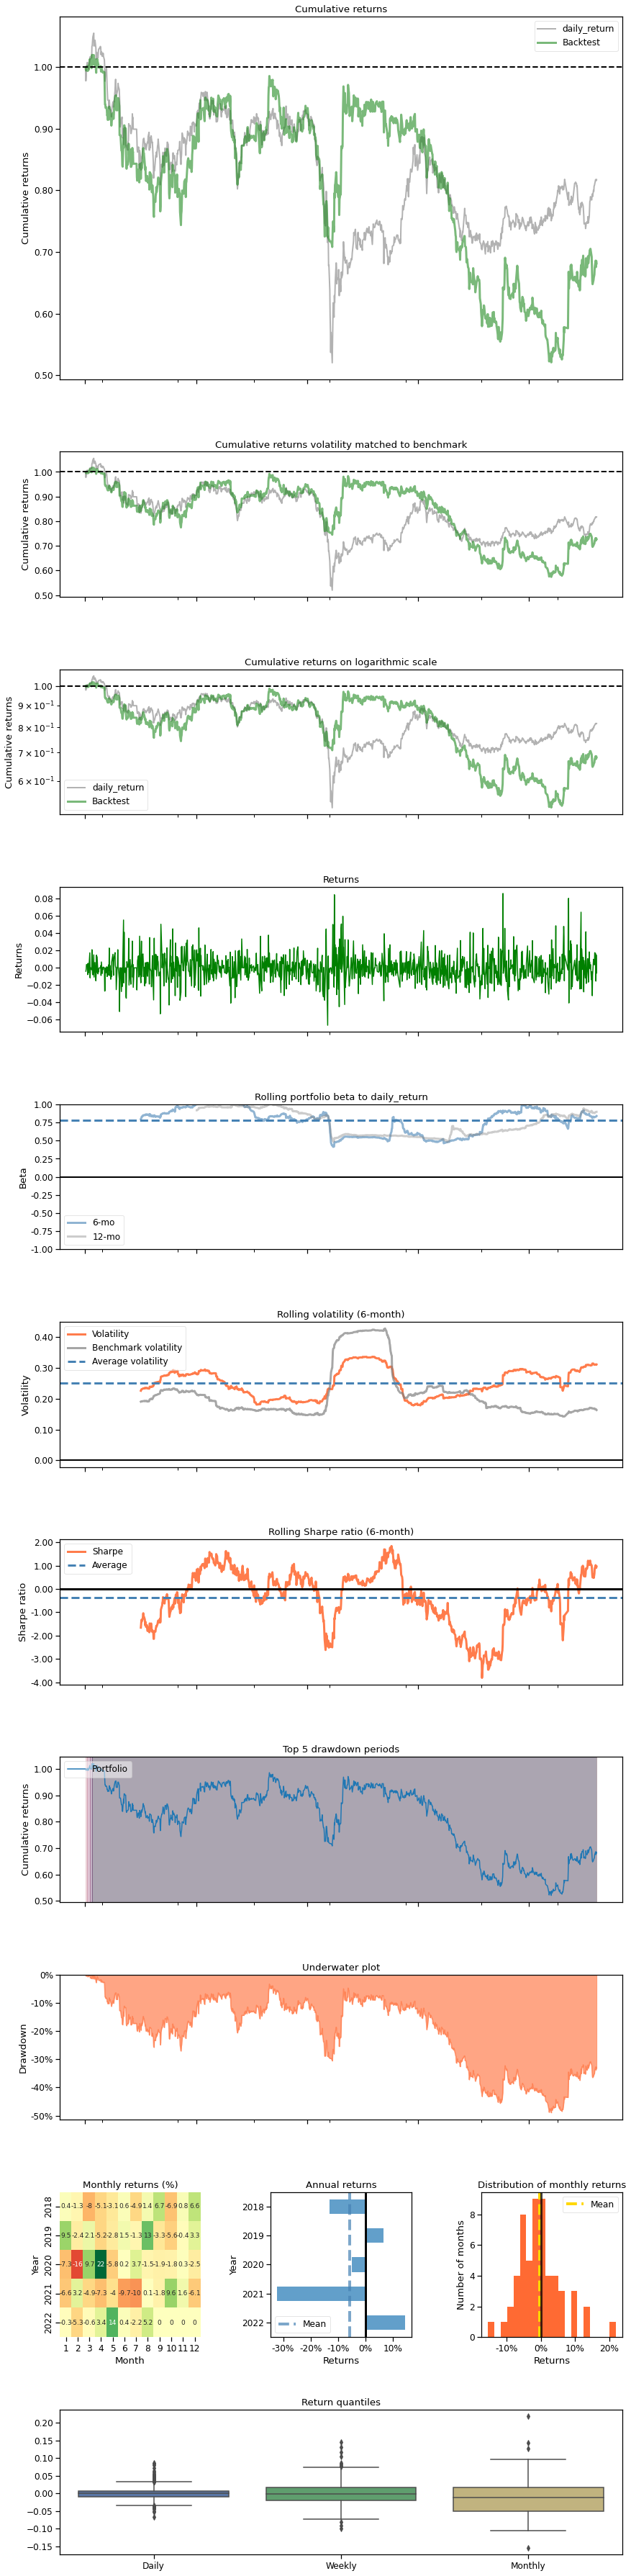

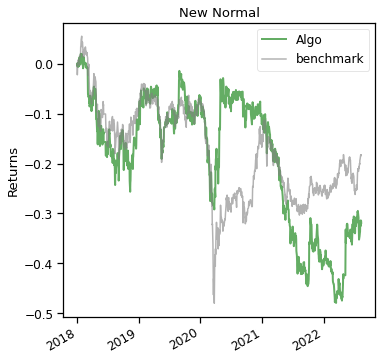

In [203]:
print("===========A2C Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_a2c, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_a2c.loc[0,'date'],
             baseline_end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

###8.2.2. Agen PPO

===========PPO Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1119, 8)


Start date,2018-01-02
End date,2022-08-11
Total months,53
,Backtest
Annual return,-3.8%
Cumulative returns,-15.805%
Annual volatility,19.153%
Sharpe ratio,-0.11
Calmar ratio,-0.09
Stability,0.46
Max drawdown,-44.528%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.53,2019-12-18,2021-07-30,NaT,NaN
1,10.78,2019-04-30,2019-05-17,2019-08-19,80
2,8.06,2019-09-12,2019-11-14,2019-12-03,59
3,5.24,2018-01-08,2018-09-13,2018-11-13,222
4,4.27,2018-12-07,2018-12-18,2019-01-11,26


Stress Events,mean,min,max
New Normal,-0.01%,-8.55%,7.54%


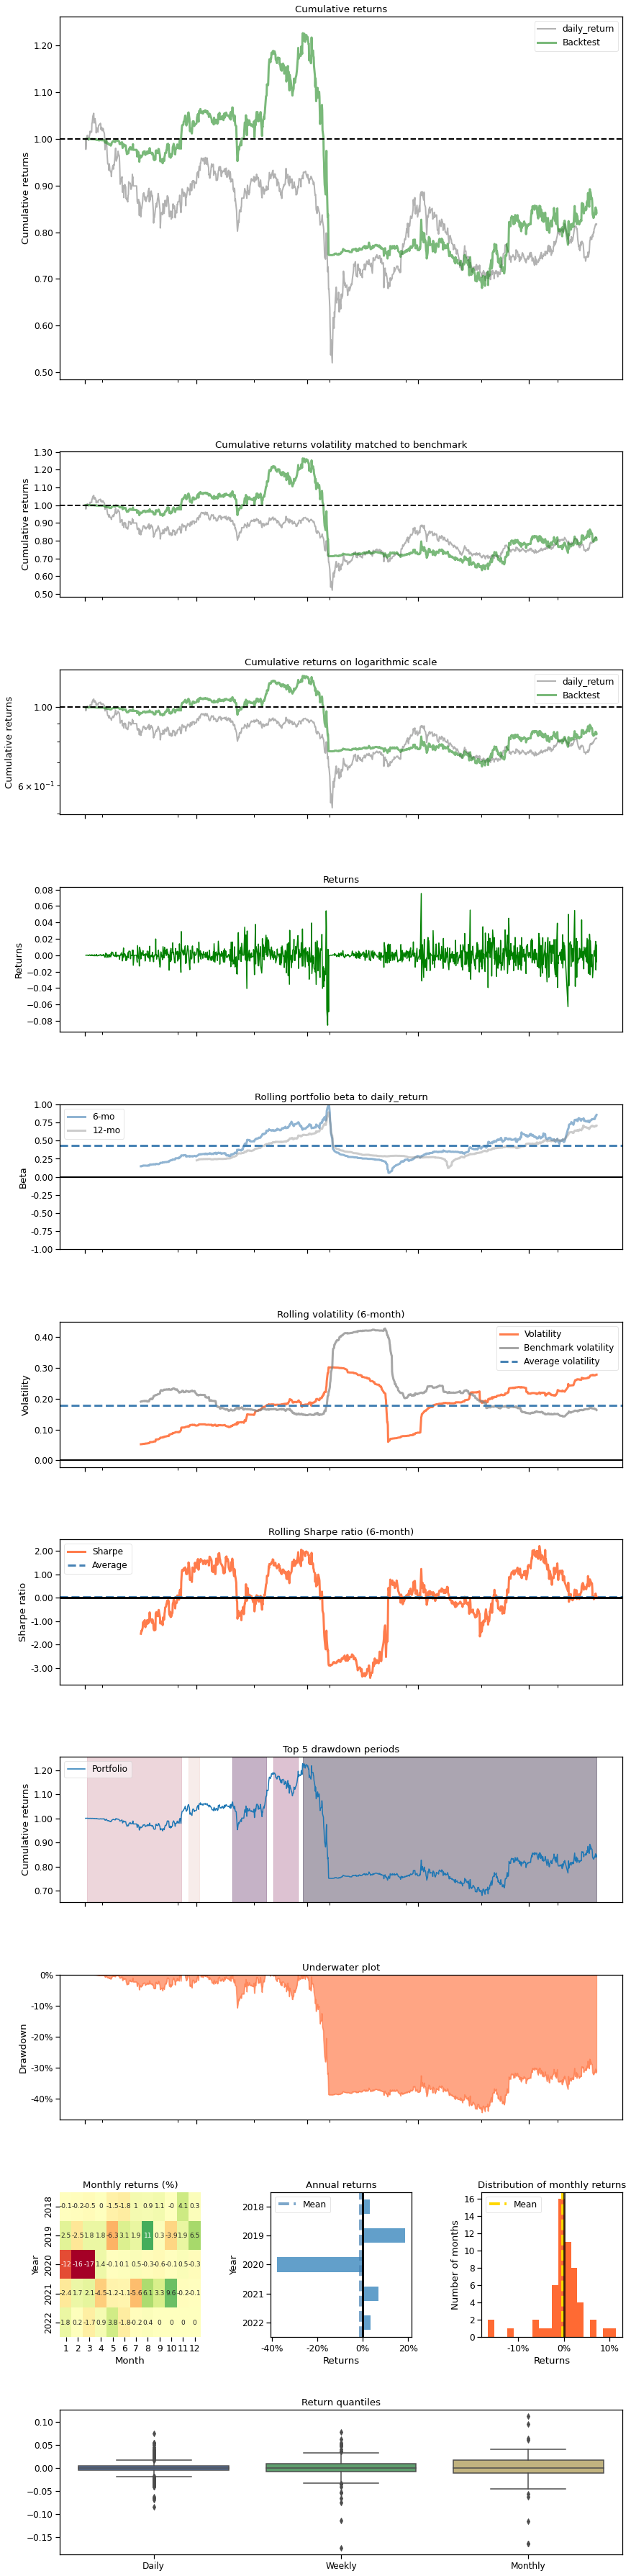

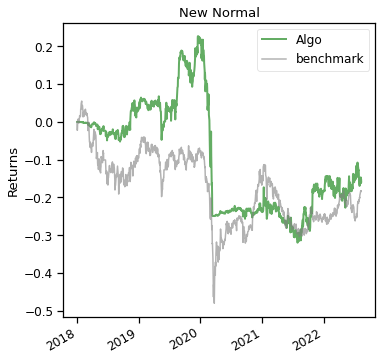

In [204]:
print("===========PPO Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_ppo, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_ppo.loc[0,'date'],
             baseline_end = df_account_value_ppo.loc[len(df_account_value_ppo)-1,'date'])

###8.2.3. Agen TD3

===========TD3 Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1119, 8)


Start date,2018-01-02
End date,2022-08-11
Total months,53
,Backtest
Annual return,-10.351%
Cumulative returns,-38.442%
Annual volatility,28.05%
Sharpe ratio,-0.25
Calmar ratio,-0.18
Stability,0.60
Max drawdown,-57.912%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,57.91,2018-01-29,2022-03-15,NaT,NaN
1,1.48,2018-01-24,2018-01-26,2018-01-29,4
2,1.24,2018-01-16,2018-01-22,2018-01-23,6
3,0.78,2018-01-02,2018-01-09,2018-01-11,8
4,0.17,2018-01-11,2018-01-12,2018-01-16,4


Stress Events,mean,min,max
New Normal,-0.03%,-6.53%,10.90%


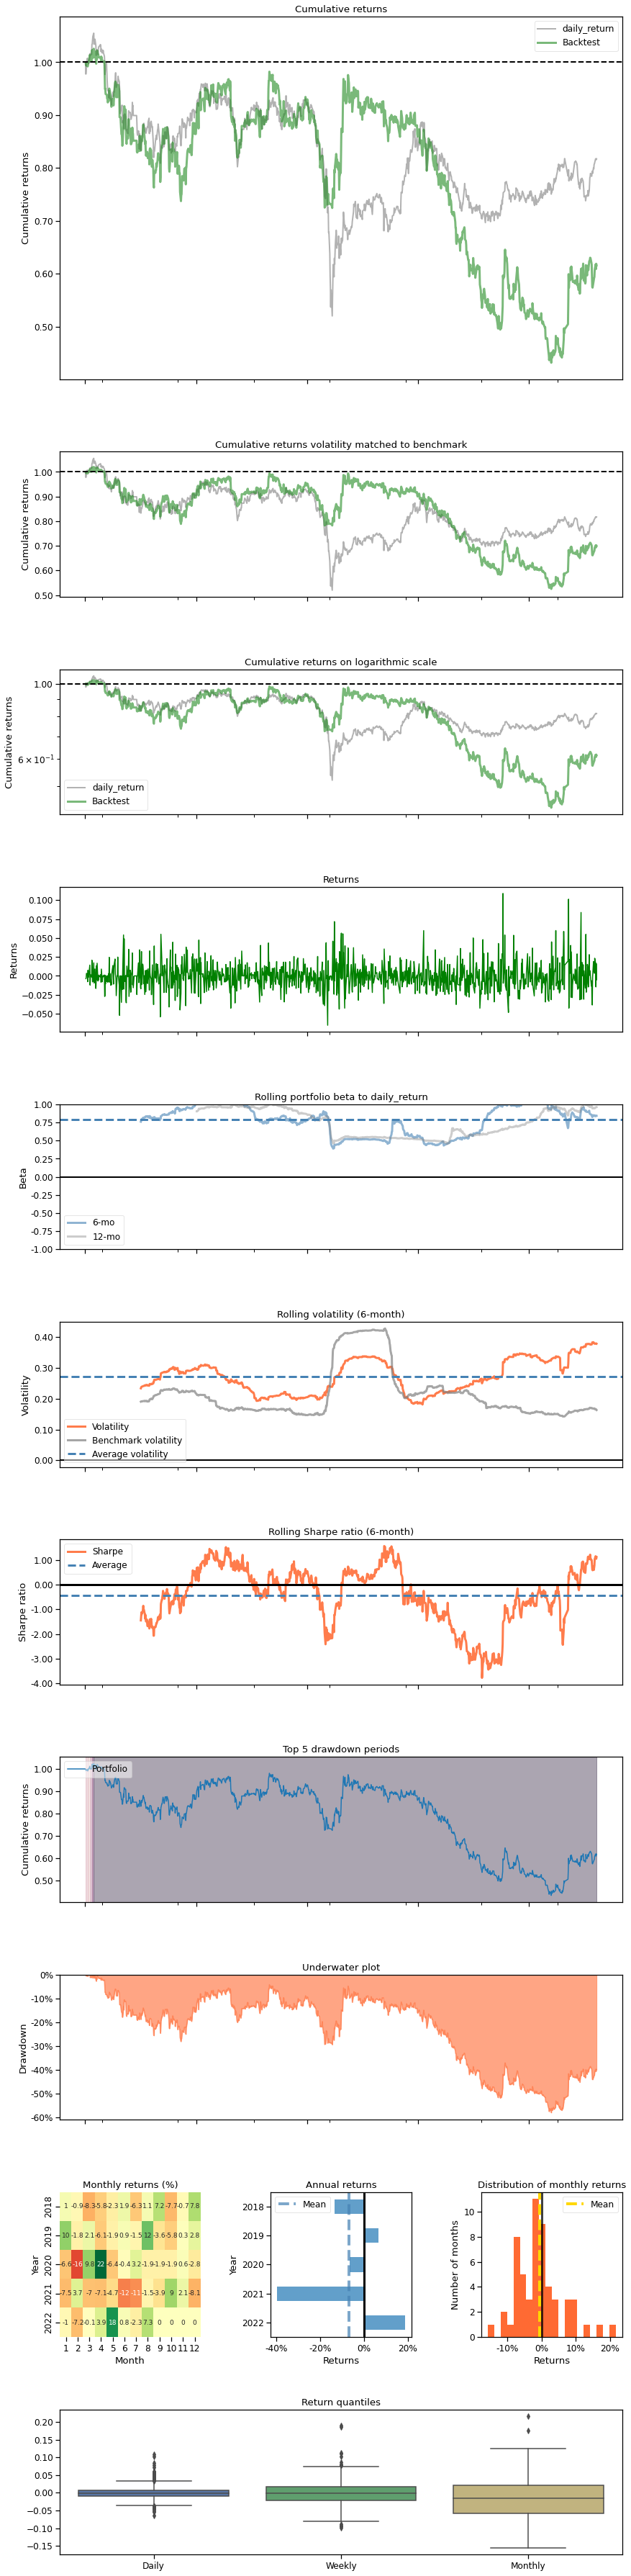

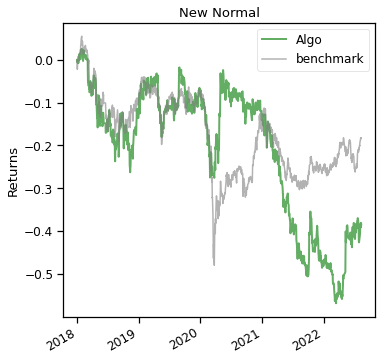

In [205]:
print("===========TD3 Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_td3, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_td3.loc[0,'date'],
             baseline_end = df_account_value_td3.loc[len(df_account_value_td3)-1,'date'])

###8.2.4. Agen SAC

============SAC Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1119, 8)


Start date,2018-01-02
End date,2022-08-11
Total months,53
,Backtest
Annual return,-7.731%
Cumulative returns,-30.043%
Annual volatility,24.757%
Sharpe ratio,-0.20
Calmar ratio,-0.16
Stability,0.47
Max drawdown,-48.766%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,48.77,2018-02-09,2022-03-08,NaT,NaN
1,2.76,2018-01-29,2018-02-06,2018-02-09,10
2,1.14,2018-01-16,2018-01-18,2018-01-23,6
3,1.00,2018-01-25,2018-01-26,2018-01-29,3
4,0.82,2018-01-08,2018-01-09,2018-01-16,7


Stress Events,mean,min,max
New Normal,-0.02%,-5.27%,8.77%


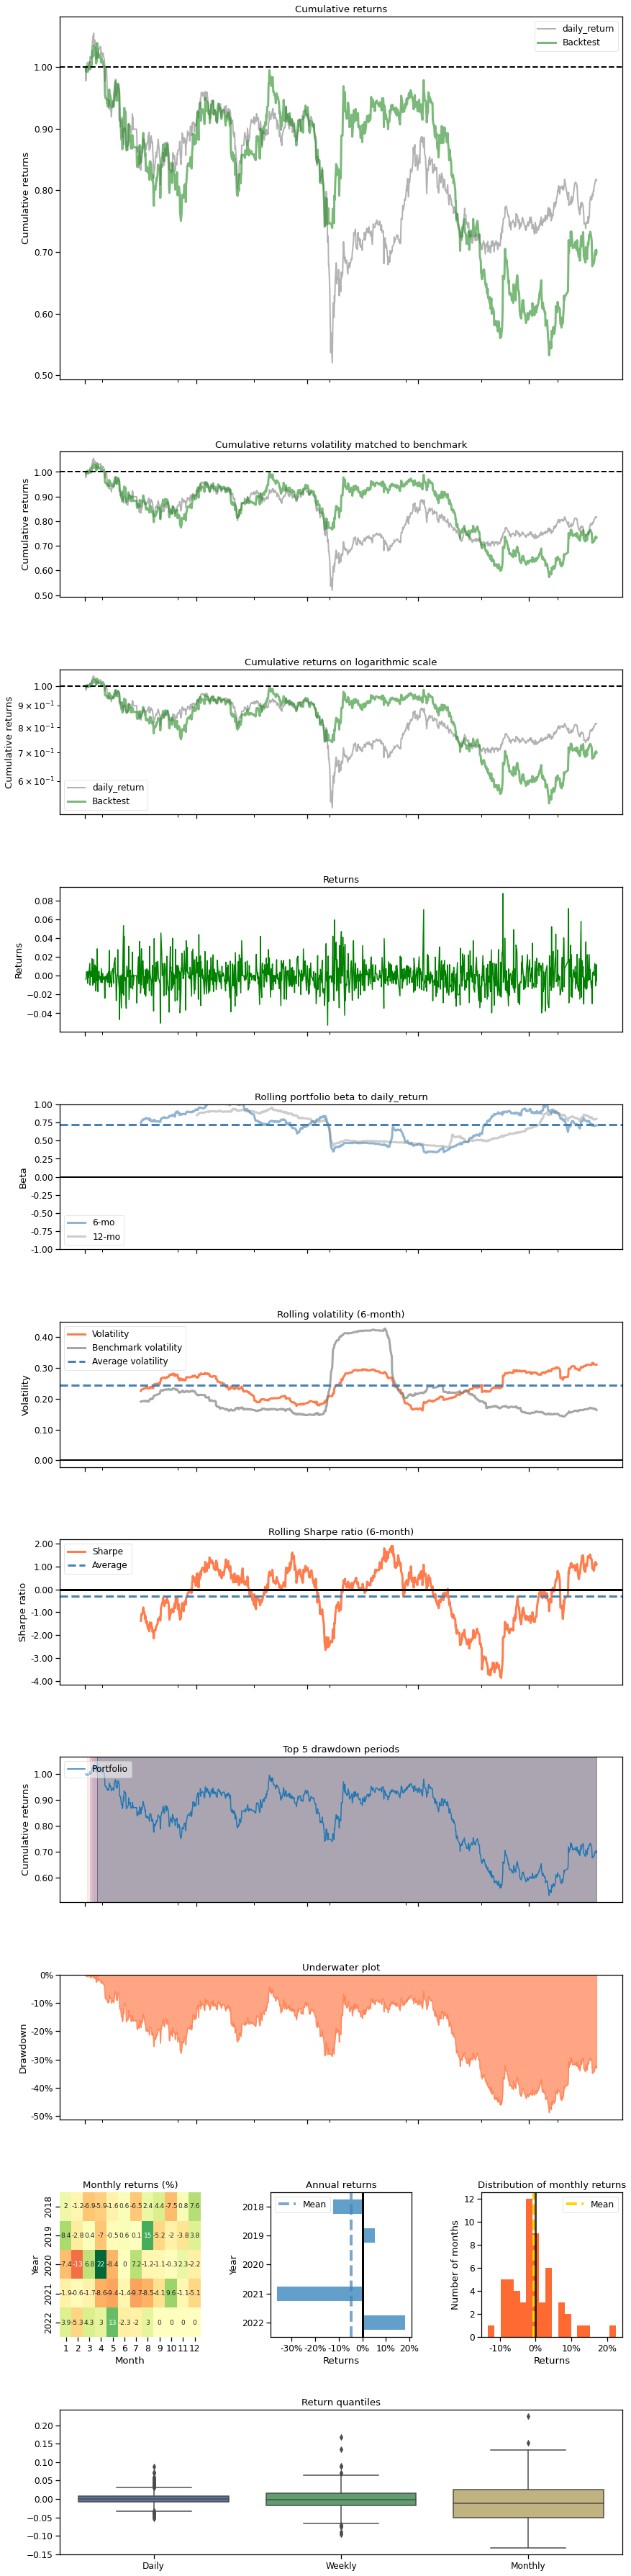

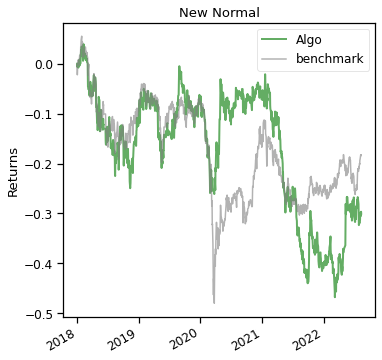

In [206]:
print("============SAC Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_sac, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_sac.loc[0,'date'],
             baseline_end = df_account_value_sac.loc[len(df_account_value_sac)-1,'date'])

###8.2.5. Agen DDPG

===========DDPG Compare to JII===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1119, 8)


Start date,2018-01-02
End date,2022-08-11
Total months,53
,Backtest
Annual return,10.637%
Cumulative returns,56.651%
Annual volatility,29.798%
Sharpe ratio,0.49
Calmar ratio,0.21
Stability,0.40
Max drawdown,-51.34%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,51.34,2019-12-26,2020-09-10,NaT,NaN
1,28.82,2018-05-02,2018-10-04,2019-02-26,215
2,14.16,2019-05-10,2019-06-20,2019-07-19,51
3,13.03,2019-09-11,2019-10-07,2019-11-13,46
4,7.82,2018-02-01,2018-03-08,2018-04-18,55


Stress Events,mean,min,max
New Normal,0.06%,-9.63%,10.72%


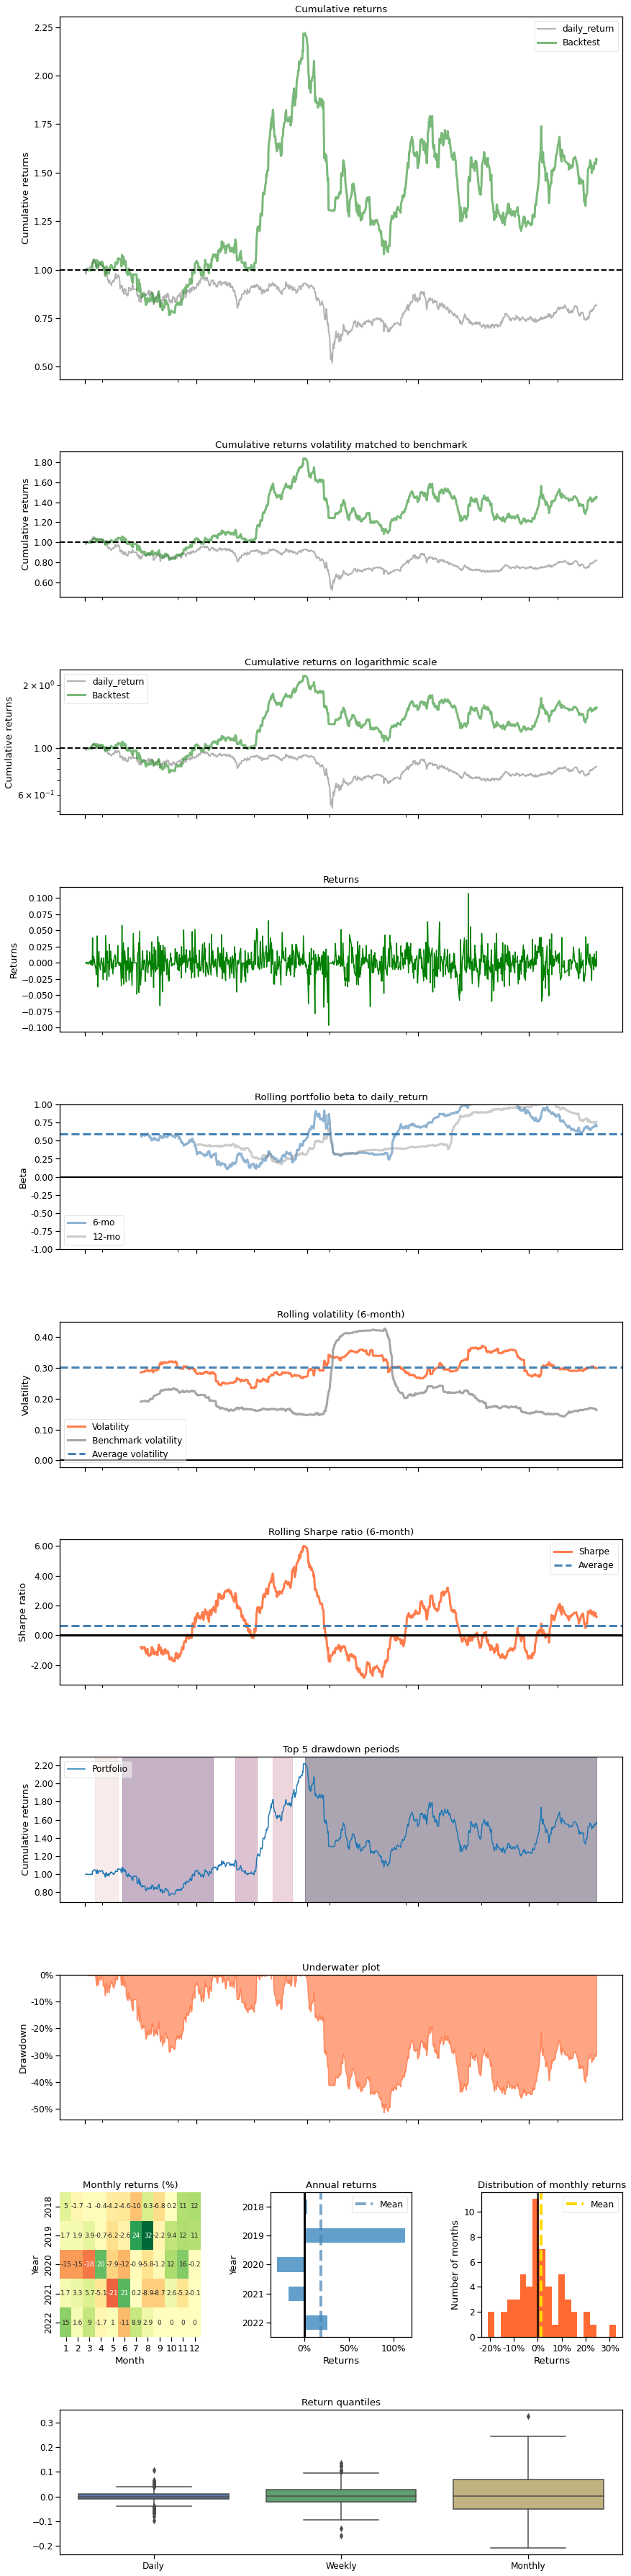

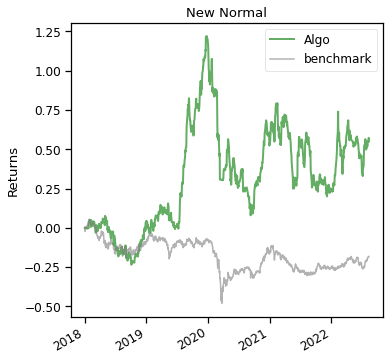

In [207]:
print("===========DDPG Compare to JII===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# JII: ^JKII
backtest_plot(df_account_value_ddpg, 
             baseline_ticker = '^JKII', 
             baseline_start = df_account_value_ddpg.loc[0,'date'],
             baseline_end = df_account_value_ddpg.loc[len(df_account_value_ddpg)-1,'date'])